In [1]:
import pandas as pd
import os
import numpy as np
from collections import OrderedDict
import matplotlib as mpl
mpl.use('Agg')
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import os
from reportlab.lib import colors
from reportlab.lib.units import cm
from Bio.Graphics import GenomeDiagram
from Bio.SeqFeature import SeqFeature, FeatureLocation
import csv
#sns.use('Agg')
from numpy import outer
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', 240 )

%matplotlib inline



In [2]:
path = '.'


# Annotation data
prepare DFs for genome maps

#### Load annotation data and blast results file

In [48]:
group_A_map_df  =  pd.read_csv(path + '/group_A_annotations_for_circle.txt',
                               delimiter='\t',low_memory=False)
group_B1_map_df  =  pd.read_csv(path + '/group_B1_annotations_for_circle.txt',
                               delimiter='\t',low_memory=False)
group_C_map_df  =  pd.read_csv(path + '/group_C_annotations_for_circle.txt',
                               delimiter='\t',low_memory=False)
group_B2_map_df  =  pd.read_csv(path + '/group_B2_annotations_for_circle.txt',
                               delimiter='\t',low_memory=False)
all_v_all_blastp_results  =  pd.read_csv(path + '/new_26_repr_all_v_all_blastp_results.tsv',
                               delimiter='\t',low_memory=False, header=None)

all_v_all_blastp_results = all_v_all_blastp_results.rename(columns = {0:'qseqid', 1 : 'sseqid', 2 : 'pident', 3 : 'length',
                            4 : 'mismatch', 5 : 'gapopen', 6 : 'qstart', 7 :  'qend', 8 : 'sstart', 9 : 'send',
                            10 : 'evalue', 11 : 'bitscore'})      


### assign colors to annotations

In [49]:
### Group A
l = []
for row, columns in group_A_map_df.iterrows():
    #print(columns['orf_annotation'])
    if columns['orf_annotation'] == 'hypothetical protein':
        l.append('Gray')
    elif 'thermosome' in str(columns['orf_annotation']):
        l.append('Red')
    elif 'DNA polymerase family B' in str(columns['orf_annotation']):
        l.append('Blue')
    elif 'DUF' in str(columns['orf_annotation']):
        l.append('grey35')
    else:
        l.append('whitesmoke')
        
ll = pd.Series(l)
group_A_map_df.loc[:,'col'] = pd.Series(ll, index=group_A_map_df.index)

In [50]:
### Group B1
l = []
for row, columns in group_B1_map_df.iterrows():
    #print(columns['orf_annotation'])
    if columns['orf_annotation'] == 'hypothetical protein':
        l.append('Gray')
    elif 'thermosome' in str(columns['orf_annotation']):
        l.append('Red')
    elif 'DNA polymerase family B' in str(columns['orf_annotation']):
        l.append('Blue')
    elif 'DUF' in str(columns['orf_annotation']):
        l.append('grey35')
    else:
        l.append('whitesmoke')
        
ll = pd.Series(l)
group_B1_map_df.loc[:,'col'] = pd.Series(ll, index=group_B1_map_df.index)

In [51]:
### Group C
l = []
for row, columns in group_C_map_df.iterrows():
    #print(columns['orf_annotation'])
    if columns['orf_annotation'] == 'hypothetical protein':
        l.append('Gray')
    elif 'thermosome' in str(columns['orf_annotation']):
        l.append('Red')
    elif 'DNA polymerase family B' in str(columns['orf_annotation']):
        l.append('Blue')
    elif 'DUF' in str(columns['orf_annotation']):
        l.append('grey35')
    else:
        l.append('whitesmoke')
        
ll = pd.Series(l)
group_C_map_df.loc[:,'col'] = pd.Series(ll, index=group_C_map_df.index)

In [52]:
### Group B2
l = []
for row, columns in group_B2_map_df.iterrows():
    #print(columns['orf_annotation'])
    if columns['orf_annotation'] == 'hypothetical protein':
        l.append('Gray')
    elif 'thermosome' in str(columns['orf_annotation']):
        l.append('Red')
    elif 'DNA polymerase family B' in str(columns['orf_annotation']):
        l.append('Blue')
    elif 'DUF' in str(columns['orf_annotation']):
        l.append('grey35')
    else:
        l.append('whitesmoke')
        
ll = pd.Series(l)
group_B2_map_df.loc[:,'col'] = pd.Series(ll, index=group_B2_map_df.index)

### add further plotting parameters columns

In [53]:
## group A
group_A_map_df['gene_type'] = 'arrows'
group_A_map_df['cex'] = 1 #number indicating the amount by which plotting text and symbols should be scaled relative to the default. 
                          #1=default, 1.5 is 50% larger, 0.5 is 50% smaller, etc.
group_A_map_df['lty'] = 1 #line type 1-> solid
group_A_map_df['lwd'] = 1 #line width relative to the default (default=1). 2 is twice as wide.
group_A_map_df['pch'] = 8


In [54]:
## group B
group_B1_map_df['gene_type'] = 'arrows'
group_B1_map_df['cex'] = 1 #number indicating the amount by which plotting text and symbols should be scaled relative to the default. 
                          #1=default, 1.5 is 50% larger, 0.5 is 50% smaller, etc.
group_B1_map_df['lty'] = 1 #line type 1-> solid
group_B1_map_df['lwd'] = 1 #line width relative to the default (default=1). 2 is twice as wide.
group_B1_map_df['pch'] = 8

In [55]:
## group C
group_C_map_df['gene_type'] = 'arrows'
group_C_map_df['cex'] = 1 #number indicating the amount by which plotting text and symbols should be scaled relative to the default. 
                          #1=default, 1.5 is 50% larger, 0.5 is 50% smaller, etc.
group_C_map_df['lty'] = 1 #line type 1-> solid
group_C_map_df['lwd'] = 1 #line width relative to the default (default=1). 2 is twice as wide.
group_C_map_df['pch'] = 8

In [56]:
## group X
group_B2_map_df['gene_type'] = 'arrows'
group_B2_map_df['cex'] = 1 #number indicating the amount by which plotting text and symbols should be scaled relative to the default. 
                          #1=default, 1.5 is 50% larger, 0.5 is 50% smaller, etc.
group_B2_map_df['lty'] = 1 #line type 1-> solid
group_B2_map_df['lwd'] = 1 #line width relative to the default (default=1). 2 is twice as wide.
group_B2_map_df['pch'] = 8

In [57]:
contig_156409_group_A_annotation = group_A_map_df[group_A_map_df['chr'] == 'contig_156409']
contig_154566_group_A_annotation = group_A_map_df[group_A_map_df['chr'] == 'contig_154566']
contig_155688_group_A_annotation = group_A_map_df[group_A_map_df['chr'] == 'contig_155688']
SAMEA2621085_65_group_A_annotation = group_A_map_df[group_A_map_df['chr'] == 'SAMEA2621085_65']
SAMEA2619923_17_group_A_annotation = group_A_map_df[group_A_map_df['chr'] == 'SAMEA2619923_17']
SAMEA2621151_40_group_A_annotation = group_A_map_df[group_A_map_df['chr'] == 'SAMEA2621151_40']



In [58]:
complete_871648617_group_B1_annotation = group_B1_map_df[group_B1_map_df['chr'] == '871648617_complete']
contig_154592_group_B1_annotation = group_B1_map_df[group_B1_map_df['chr'] == 'contig_154592']
contig_154676_group_B1_annotation = group_B1_map_df[group_B1_map_df['chr'] == 'contig_154676']
ext_777660975_group_B1_annotation = group_B1_map_df[group_B1_map_df['chr'] == '777660975_ext']
ext_786803042_group_B1_annotation = group_B1_map_df[group_B1_map_df['chr'] == '786803042']
ext_837327169_group_B1_annotation = group_B1_map_df[group_B1_map_df['chr'] == '837327169_ext']
contig_154680_group_B1_annotation = group_B1_map_df[group_B1_map_df['chr'] == 'contig_154680']

In [59]:
contig_155057_group_C_annotation = group_C_map_df[group_C_map_df['chr'] == 'contig_155057']
contig_172037_group_C_annotation = group_C_map_df[group_C_map_df['chr'] == 'contig_172037']
ext_766270197_group_C_annotation = group_C_map_df[group_C_map_df['chr'] == '766270197_ext']
ext_775118401_group_C_annotation = group_C_map_df[group_C_map_df['chr'] == '775118401_ext']
ext_778722464_group_C_annotation = group_C_map_df[group_C_map_df['chr'] == '778722464']
ext_786772955_group_C_annotation = group_C_map_df[group_C_map_df['chr'] == '786772955']
contig_154940_group_C_annotation = group_C_map_df[group_C_map_df['chr'] == 'contig_154940']

In [60]:
contig_155773_group_B2_annotation = group_B2_map_df[group_B2_map_df['chr'] == 'contig_155773']
SAMEA2620879_23_group_B2_annotation = group_B2_map_df[group_B2_map_df['chr'] == 'SAMEA2620879_23']
SAMEA2620078_38_group_B2_annotation = group_B2_map_df[group_B2_map_df['chr'] == 'SAMEA2620078_38']
SAMEA2621151_104_ext_group_B2_annotation = group_B2_map_df[group_B2_map_df['chr'] == 'SAMEA2621151_104_ext']


### rearrange columns

#### Group A

In [61]:
cols = contig_156409_group_A_annotation.columns.tolist()

cols = cols[1:4] + cols[5:6] + cols[6:] + cols[0:1]

contig_156409_group_A_annotation = contig_156409_group_A_annotation[cols]
contig_154566_group_A_annotation = contig_154566_group_A_annotation[cols]
contig_155688_group_A_annotation = contig_155688_group_A_annotation[cols]
SAMEA2621085_65_group_A_annotation = SAMEA2621085_65_group_A_annotation[cols]
SAMEA2619923_17_group_A_annotation = SAMEA2619923_17_group_A_annotation[cols]
SAMEA2621151_40_group_A_annotation = SAMEA2621151_40_group_A_annotation[cols]

#### save 

In [62]:
contig_156409_group_A_annotation.to_csv(path + '/DataFrames/contig_156409_group_A_annotation.csv', index = None)
contig_154566_group_A_annotation.to_csv(path + '/DataFrames/contig_154566_group_A_annotation.csv', index = None)
contig_155688_group_A_annotation.to_csv(path + '/DataFrames/contig_155688_group_A_annotation.csv', index = None)

SAMEA2621085_65_group_A_annotation.to_csv(path + '/DataFrames/SAMEA2621085_65_group_A_annotation.csv', index = None)
SAMEA2619923_17_group_A_annotation.to_csv(path + '/DataFrames/SAMEA2619923_17_group_A_annotation.csv', index = None)
SAMEA2621151_40_group_A_annotation.to_csv(path + '/DataFrames/SAMEA2621151_40_group_A_annotation.csv', index = None)

### Group B

In [63]:
cols = contig_154592_group_B1_annotation.columns.tolist()

cols = cols[1:4] + cols[5:6] + cols[6:] + cols[0:1]

complete_871648617_group_B1_annotation = complete_871648617_group_B1_annotation[cols]
contig_154592_group_B1_annotation = contig_154592_group_B1_annotation[cols]
contig_154676_group_B1_annotation = contig_154676_group_B1_annotation[cols]
ext_777660975_group_B1_annotation = ext_777660975_group_B1_annotation[cols]
ext_786803042_group_B1_annotation = ext_786803042_group_B1_annotation[cols]
ext_837327169_group_B1_annotation = ext_837327169_group_B1_annotation[cols]
contig_154680_group_B1_annotation = contig_154680_group_B1_annotation[cols]

#### save

In [64]:
complete_871648617_group_B1_annotation.to_csv(path + '/DataFrames/complete_871648617_group_B1_annotation.csv', index = None)
contig_154592_group_B1_annotation.to_csv(path + '/DataFrames/contig_154592_group_B1_annotation.csv', index = None)
contig_154676_group_B1_annotation.to_csv(path + '/DataFrames/contig_154676_group_B1_annotation.csv', index = None)

ext_777660975_group_B1_annotation.to_csv(path + '/DataFrames/ext_777660975_group_B1_annotation.csv', index = None)
ext_786803042_group_B1_annotation.to_csv(path + '/DataFrames/ext_786803042_group_B1_annotation.csv', index = None)
ext_837327169_group_B1_annotation.to_csv(path + '/DataFrames/ext_837327169_group_B1_annotation.csv', index = None)
contig_154680_group_B1_annotation.to_csv(path + '/DataFrames/contig_154680_group_B1_annotation.csv', index = None)



### Group C

In [65]:
cols = contig_155057_group_C_annotation.columns.tolist()

cols = cols[1:4] + cols[5:6] + cols[6:] + cols[0:1]

contig_155057_group_C_annotation = contig_155057_group_C_annotation[cols]
contig_172037_group_C_annotation = contig_172037_group_C_annotation[cols]
ext_766270197_group_C_annotation = ext_766270197_group_C_annotation[cols]
ext_775118401_group_C_annotation = ext_775118401_group_C_annotation[cols]
ext_778722464_group_C_annotation = ext_778722464_group_C_annotation[cols]
ext_786772955_group_C_annotation = ext_786772955_group_C_annotation[cols]
contig_154940_group_C_annotation = contig_154940_group_C_annotation[cols]

##### Save

In [66]:
contig_155057_group_C_annotation.to_csv(path + '/DataFrames/contig_155057_group_C_annotation.csv', index = None)
contig_172037_group_C_annotation.to_csv(path + '/DataFrames/contig_172037_group_C_annotation.csv', index = None)
contig_172037_group_C_annotation.to_csv(path + '/DataFrames/contig_172037_group_C_annotation.csv', index = None)

ext_775118401_group_C_annotation.to_csv(path + '/DataFrames/ext_775118401_group_C_annotation.csv', index = None)
ext_778722464_group_C_annotation.to_csv(path + '/DataFrames/ext_778722464_group_C_annotation.csv', index = None)
ext_786772955_group_C_annotation.to_csv(path + '/DataFrames/ext_786772955_group_C_annotation.csv', index = None)
contig_154940_group_C_annotation.to_csv(path + '/DataFrames/contig_154940_group_C_annotation.csv', index = None)




### Group B2

In [67]:
cols = contig_155773_group_B2_annotation.columns.tolist()

cols = cols[1:4] + cols[5:6] + cols[6:] + cols[0:1]

contig_155773_group_B2_annotation = contig_155773_group_B2_annotation[cols]
SAMEA2620879_23_group_B2_annotation = SAMEA2620879_23_group_B2_annotation[cols]
SAMEA2620078_38_group_B2_annotation = SAMEA2620078_38_group_B2_annotation[cols]
SAMEA2621151_104_ext_group_B2_annotation = SAMEA2621151_104_ext_group_B2_annotation[cols]


##### Save

In [68]:
contig_155773_group_B2_annotation.to_csv(path + '/DataFrames/contig_155773_groupB2X_annotation.csv', index = None)
SAMEA2620879_23_group_B2_annotation.to_csv(path + '/DataFrames/SAMEA2620879_23_group_B2_annotation.csv', index = None)
SAMEA2620078_38_group_B2_annotation.to_csv(path + '/DataFrames/SAMEA2620078_38_group_B2_annotation.csv', index = None)
SAMEA2621151_104_ext_group_B2_annotation.to_csv(path + '/DataFrames/SAMEA2621151_104_ext_group_B2_annotation.csv', index = None)



## blastp all orf vs all results



### group A all contigs

In [69]:
all_v_all_blastp_results_groupA_blast = all_v_all_blastp_results[(all_v_all_blastp_results['qseqid'].str.contains('contig_156409') |
                         all_v_all_blastp_results['qseqid'].str.contains('contig_155688') |
                         all_v_all_blastp_results['qseqid'].str.contains('contig_154566') |
                         all_v_all_blastp_results['qseqid'].str.contains('SAMEA2621061_122') |
                         all_v_all_blastp_results['qseqid'].str.contains('SAMEA2619923_17')  |
                         all_v_all_blastp_results['qseqid'].str.contains('SAMEA2621085_65')  |
                         all_v_all_blastp_results['qseqid'].str.contains('SAMEA2621151_40')) &
                         (all_v_all_blastp_results['sseqid'].str.contains('contig_154566') |
                         all_v_all_blastp_results['sseqid'].str.contains('contig_155688') |
                         all_v_all_blastp_results['sseqid'].str.contains('contig_156409') |
                         all_v_all_blastp_results['sseqid'].str.contains('SAMEA2621061_122') |
                         all_v_all_blastp_results['sseqid'].str.contains('SAMEA2619923_17')  |
                         all_v_all_blastp_results['sseqid'].str.contains('SAMEA2621085_65')  |
                         all_v_all_blastp_results['sseqid'].str.contains('SAMEA2621151_40'))]
   



all_v_all_blastp_results_groupA_blast =  all_v_all_blastp_results_groupA_blast[
    (all_v_all_blastp_results_groupA_blast['qseqid'] != all_v_all_blastp_results_groupA_blast['sseqid']) &
                        (all_v_all_blastp_results_groupA_blast['pident'] >= 50.0) &
    (all_v_all_blastp_results_groupA_blast['bitscore'] >= 80.0)]

### group B1 all contigs

In [70]:
all_v_all_blastp_results_groupB1_blast = all_v_all_blastp_results[(all_v_all_blastp_results['qseqid'].str.contains('871648617_complete') |
                         all_v_all_blastp_results['qseqid'].str.contains('contig_154592') |
                         all_v_all_blastp_results['qseqid'].str.contains('contig_154676') |
                         all_v_all_blastp_results['qseqid'].str.contains('777660975_ext') |
                         all_v_all_blastp_results['qseqid'].str.contains('786803042')  |
                         all_v_all_blastp_results['qseqid'].str.contains('837327169_ext')  |
                         all_v_all_blastp_results['qseqid'].str.contains('contig_154680')) &
                         (all_v_all_blastp_results['sseqid'].str.contains('871648617_complete') |
                         all_v_all_blastp_results['sseqid'].str.contains('contig_154592') |
                         all_v_all_blastp_results['sseqid'].str.contains('contig_154676') |
                         all_v_all_blastp_results['sseqid'].str.contains('777660975_ext') |
                         all_v_all_blastp_results['sseqid'].str.contains('786803042')  |
                         all_v_all_blastp_results['sseqid'].str.contains('837327169_ext')  |
                         all_v_all_blastp_results['sseqid'].str.contains('contig_154680'))]
   



all_v_all_blastp_results_groupB1_blast =  all_v_all_blastp_results_groupB1_blast[
    (all_v_all_blastp_results_groupB1_blast['qseqid'] != all_v_all_blastp_results_groupB1_blast['sseqid']) &
                        (all_v_all_blastp_results_groupB1_blast['pident'] >= 50.0) &
    (all_v_all_blastp_results_groupB1_blast['bitscore'] >= 80.0)]

## Group C

In [71]:
all_v_all_blastp_results_groupC_blast = all_v_all_blastp_results[(all_v_all_blastp_results['qseqid'].str.contains('contig_155057') |
                         all_v_all_blastp_results['qseqid'].str.contains('contig_172037') |
                         all_v_all_blastp_results['qseqid'].str.contains('766270197_ext') |
                         all_v_all_blastp_results['qseqid'].str.contains('775118401_ext') |
                         all_v_all_blastp_results['qseqid'].str.contains('778722464')  |
                         all_v_all_blastp_results['qseqid'].str.contains('786772955')  |
                         all_v_all_blastp_results['qseqid'].str.contains('contig_154940')) &
                         (all_v_all_blastp_results['sseqid'].str.contains('contig_155057') |
                         all_v_all_blastp_results['sseqid'].str.contains('contig_172037') |
                         all_v_all_blastp_results['sseqid'].str.contains('766270197_ext') |
                         all_v_all_blastp_results['sseqid'].str.contains('775118401_ext') |
                         all_v_all_blastp_results['sseqid'].str.contains('778722464')  |
                         all_v_all_blastp_results['sseqid'].str.contains('786772955')  |
                         all_v_all_blastp_results['sseqid'].str.contains('contig_154940'))]
   



all_v_all_blastp_results_groupC_blast =  all_v_all_blastp_results_groupC_blast[
    (all_v_all_blastp_results_groupC_blast['qseqid'] != all_v_all_blastp_results_groupC_blast['sseqid']) &
                        (all_v_all_blastp_results_groupC_blast['pident'] >= 50.0) &
    (all_v_all_blastp_results_groupC_blast['bitscore'] >= 80.0)]

## Group B2


In [72]:
all_v_all_blastp_results_groupB2_blast = all_v_all_blastp_results[(all_v_all_blastp_results['qseqid'].str.contains('contig_155773') |
                         all_v_all_blastp_results['qseqid'].str.contains('SAMEA2620879_23') |
                         all_v_all_blastp_results['qseqid'].str.contains('SAMEA2620078_38') |
                         all_v_all_blastp_results['qseqid'].str.contains('SAMEA2621151_104_ext')) &
                         (all_v_all_blastp_results['sseqid'].str.contains('contig_155773') |
                         all_v_all_blastp_results['sseqid'].str.contains('SAMEA2620879_23') |
                         all_v_all_blastp_results['sseqid'].str.contains('SAMEA2620078_38') |
                         all_v_all_blastp_results['sseqid'].str.contains('SAMEA2621151_104_ext'))]
   



all_v_all_blastp_results_groupB2_blast =  all_v_all_blastp_results_groupB2_blast[
    (all_v_all_blastp_results_groupB2_blast['qseqid'] != all_v_all_blastp_results_groupB2_blast['sseqid']) &
                        (all_v_all_blastp_results_groupB2_blast['pident'] >= 50.0) &
    (all_v_all_blastp_results_groupB2_blast['bitscore'] >= 80.0)]

## All Group B

In [73]:
all_v_all_blastp_results_all_groupB_blast = all_v_all_blastp_results[(all_v_all_blastp_results['qseqid'].str.contains('871648617_complete') |
                         all_v_all_blastp_results['qseqid'].str.contains('contig_154592') |
                         all_v_all_blastp_results['qseqid'].str.contains('contig_154676') |
                         all_v_all_blastp_results['qseqid'].str.contains('777660975_ext') |
                         all_v_all_blastp_results['qseqid'].str.contains('786803042')  |
                         all_v_all_blastp_results['qseqid'].str.contains('837327169_ext')  |
                         all_v_all_blastp_results['qseqid'].str.contains('contig_154680')  |
                         all_v_all_blastp_results['qseqid'].str.contains('contig_155773') |
                         all_v_all_blastp_results['qseqid'].str.contains('SAMEA2620879_23') |
                         all_v_all_blastp_results['qseqid'].str.contains('SAMEA2620078_38') |
                         all_v_all_blastp_results['qseqid'].str.contains('SAMEA2621151_104_ext')) &
                         (all_v_all_blastp_results['sseqid'].str.contains('871648617_complete') |
                         all_v_all_blastp_results['sseqid'].str.contains('contig_154592') |
                         all_v_all_blastp_results['sseqid'].str.contains('contig_154676') |
                         all_v_all_blastp_results['sseqid'].str.contains('777660975_ext') |
                         all_v_all_blastp_results['sseqid'].str.contains('786803042')  |
                         all_v_all_blastp_results['sseqid'].str.contains('837327169_ext')  |
                         all_v_all_blastp_results['sseqid'].str.contains('contig_154680')  |
                         all_v_all_blastp_results['sseqid'].str.contains('contig_155773') |
                         all_v_all_blastp_results['sseqid'].str.contains('SAMEA2620879_23') |
                         all_v_all_blastp_results['sseqid'].str.contains('SAMEA2620078_38') |
                         all_v_all_blastp_results['sseqid'].str.contains('SAMEA2621151_104_ext'))]



all_v_all_blastp_results_all_groupB_blast =  all_v_all_blastp_results_groupB1_blast[
    (all_v_all_blastp_results_all_groupB_blast['qseqid'] != all_v_all_blastp_results_all_groupB_blast['sseqid']) &
                        (all_v_all_blastp_results_all_groupB_blast['pident'] >= 50.0) &
    (all_v_all_blastp_results_all_groupB_blast['bitscore'] >= 80.0)]

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


#### save

In [74]:
#all_v_all_blastp_results_groupA_blast_eilat.to_csv(path + '/data/annotations/DataFrames/all_v_all_blastp_results_groupA_blast_eilat.csv', sep='\t')
all_v_all_blastp_results_groupA_blast.to_csv(path + '/DataFrames/all_v_all_blastp_results_groupA_blast_all.csv', sep='\t')

#### create a pairwise comparison tab files between contigs


### rename query and subject columns

#### GroupA


In [75]:
all_v_all_blastp_results_groupA_blast['query_start'] = [int(group_A_map_df.loc[group_A_map_df['name'] == x]['start']) for x in all_v_all_blastp_results_groupA_blast.qseqid.values \
     if x in group_A_map_df.name.values]
all_v_all_blastp_results_groupA_blast['query_end'] = [int(group_A_map_df.loc[group_A_map_df['name'] == x]['end']) for x in all_v_all_blastp_results_groupA_blast.qseqid.values \
     if x in group_A_map_df.name.values]

all_v_all_blastp_results_groupA_blast['subject_start'] = [int(group_A_map_df.loc[group_A_map_df['name'] == x]['start']) for x in all_v_all_blastp_results_groupA_blast.sseqid.values \
     if x in group_A_map_df.name.values ]
all_v_all_blastp_results_groupA_blast['subject_end'] = [int(group_A_map_df.loc[group_A_map_df['name'] == x]['end']) for x in all_v_all_blastp_results_groupA_blast.sseqid.values \
     if x in group_A_map_df.name.values ]
all_v_all_blastp_results_groupA_blast['query_contig'] = ['_'.join(x.split('_')[2:])   for x in all_v_all_blastp_results_groupA_blast['qseqid']]
all_v_all_blastp_results_groupA_blast['subject_contig'] = ['_'.join(x.split('_')[2:])  for x in all_v_all_blastp_results_groupA_blast['sseqid']]

#### GroupB1

In [76]:
all_v_all_blastp_results_groupB1_blast['query_start'] = [int(group_B1_map_df.loc[group_B1_map_df['name'] == x]['start']) for x in all_v_all_blastp_results_groupB1_blast.qseqid.values \
     if x in group_B1_map_df.name.values]
all_v_all_blastp_results_groupB1_blast['query_end'] = [int(group_B1_map_df.loc[group_B1_map_df['name'] == x]['end']) for x in all_v_all_blastp_results_groupB1_blast.qseqid.values \
     if x in group_B1_map_df.name.values]

all_v_all_blastp_results_groupB1_blast['subject_start'] = [int(group_B1_map_df.loc[group_B1_map_df['name'] == x]['start']) for x in all_v_all_blastp_results_groupB1_blast.sseqid.values \
     if x in group_B1_map_df.name.values ]
all_v_all_blastp_results_groupB1_blast['subject_end'] = [int(group_B1_map_df.loc[group_B1_map_df['name'] == x]['end']) for x in all_v_all_blastp_results_groupB1_blast.sseqid.values \
     if x in group_B1_map_df.name.values ]

all_v_all_blastp_results_groupB1_blast['query_contig'] = ['_'.join(x.split('_')[2:])  for x in all_v_all_blastp_results_groupB1_blast['qseqid']]
all_v_all_blastp_results_groupB1_blast['subject_contig'] = ['_'.join(x.split('_')[2:]) for x in all_v_all_blastp_results_groupB1_blast['sseqid']]

### Group B2

In [77]:
all_v_all_blastp_results_groupB2_blast['query_start'] = [int(group_B2_map_df.loc[group_B2_map_df['name'] == x]['start']) for x in all_v_all_blastp_results_groupB2_blast.qseqid.values \
     if x in group_B2_map_df.name.values]
all_v_all_blastp_results_groupB2_blast['query_end'] = [int(group_B2_map_df.loc[group_B2_map_df['name'] == x]['end']) for x in all_v_all_blastp_results_groupB2_blast.qseqid.values \
     if x in group_B2_map_df.name.values]

all_v_all_blastp_results_groupB2_blast['subject_start'] = [int(group_B2_map_df.loc[group_B2_map_df['name'] == x]['start']) for x in all_v_all_blastp_results_groupB2_blast.sseqid.values \
     if x in group_B2_map_df.name.values ]
all_v_all_blastp_results_groupB2_blast['subject_end'] = [int(group_B2_map_df.loc[group_B2_map_df['name'] == x]['end']) for x in all_v_all_blastp_results_groupB2_blast.sseqid.values \
     if x in group_B2_map_df.name.values ]
all_v_all_blastp_results_groupB2_blast['query_contig'] = ['_'.join(x.split('_')[2:])   for x in all_v_all_blastp_results_groupB2_blast['qseqid']]
all_v_all_blastp_results_groupB2_blast['subject_contig'] = ['_'.join(x.split('_')[2:])  for x in all_v_all_blastp_results_groupB2_blast['sseqid']]

#### group C

In [78]:
all_v_all_blastp_results_groupC_blast['query_start'] = [int(group_C_map_df.loc[group_C_map_df['name'] == x]['start']) for x in all_v_all_blastp_results_groupC_blast.qseqid.values \
     if x in group_C_map_df.name.values]
all_v_all_blastp_results_groupC_blast['query_end'] = [int(group_C_map_df.loc[group_C_map_df['name'] == x]['end']) for x in all_v_all_blastp_results_groupC_blast.qseqid.values \
     if x in group_C_map_df.name.values]

all_v_all_blastp_results_groupC_blast['subject_start'] = [int(group_C_map_df.loc[group_C_map_df['name'] == x]['start']) for x in all_v_all_blastp_results_groupC_blast.sseqid.values \
     if x in group_C_map_df.name.values ]
all_v_all_blastp_results_groupC_blast['subject_end'] = [int(group_C_map_df.loc[group_C_map_df['name'] == x]['end']) for x in all_v_all_blastp_results_groupC_blast.sseqid.values \
     if x in group_C_map_df.name.values ]
all_v_all_blastp_results_groupC_blast['query_contig'] = ['_'.join(x.split('_')[2:])  for x in all_v_all_blastp_results_groupC_blast['qseqid']]
all_v_all_blastp_results_groupC_blast['subject_contig'] = ['_'.join(x.split('_')[2:])  for x in all_v_all_blastp_results_groupC_blast['sseqid']]

In [80]:



#all_v_all_plus_annotation.to_csv(path +
 #   '/all_v_all_plus_annotation_start_end.tsv', sep='\t', index = None)


all_v_all_blastp_results_groupA_blast.to_csv(path +
    '/all_v_all_blastp_results_groupA_blast.tsv', sep='\t', index = None)


all_v_all_blastp_results_groupB1_blast.to_csv(path +
    '/all_v_all_blastp_results_groupB1_blast.tsv', sep='\t', index = None)


all_v_all_blastp_results_groupB2_blast.to_csv(path +
    '/all_v_all_blastp_results_groupB2_blast.tsv', sep='\t', index = None)

all_v_all_blastp_results_groupC_blast.to_csv(path +
    '/all_v_all_blastp_results_groupC_blast.tsv', sep='\t', index = None)


## Genome Maps

In [111]:
Category_dict = pd.read_csv(path +  '/ORF_annotation_cat.tsv', delimiter ='\t', comment='#', header=0)#, index_col='annotation')

Category_dict  = dict(zip(Category_dict.annotation, Category_dict.category)) #pd.DataFrame.to_dict(Category_dict, orient='series')#

In [112]:
#Category_dict

In [113]:
Category_color_dict = {'Coenzyme transport and metabolism' : '#117A65',
 'DNA packaging' : '#F5B7B1',
 'Nucleotide and amino acid metabolism' : '#C39BD3',
 'Replication, recombination and repair' : '#E74C3C',
 'Structural protein' : '#5DADE2',
 'Translation, ribosomal structure and biogenesis' : '#F5B7B1',
 'hypothetical protein' : '#BDC3C7',
 'Conserved protein' : '#839192',
 'chaperonin' : '#27AE60',
 'Translation, ribosomal structure and biogenesis' : '#C39BD3'}

### HVTV-1

In [114]:
HVTV1 = pd.read_csv(path + '/Halo_Viruses/Halovirus_HVTV-1.gff3', delimiter ='\t', comment='#', header=None)

HVTV1 = HVTV1.rename(columns = {0:'Accession', 1:'Source', 2:'Type', 3:'Start', 4:'End', 5:'Score', 
                             6:'Strand', 7:'Phase', 8:'Description'})
HVTV1 = HVTV1[HVTV1['Type'] == 'CDS']
product_list = [[''.join(y.split('=')[1]) for y in x.split(';') if 'product' in y] for x in HVTV1.Description]
HVTV1['Product'] = [''.join(x) for x in product_list]

gene_list = [[''.join(y.split('=')[1]) for y in x.split(';') if 'gene=' in y] for x in HVTV1.Description]
HVTV1['Gene'] = [''.join(x) for x in gene_list]

HVTV1_feature_set = GenomeDiagram.FeatureSet()
HVTV1_gd = GenomeDiagram.Diagram('HVTV1')
HVTV1_gd_features = HVTV1_gd.new_track(1, greytrack=0, name='', scale_ticks=0.1 ,scale_smalltick_lables=1, scale_smalltick_interval=10000, scale_smallticks=-0.3)
HVTV1_gd_features = HVTV1_gd_features.new_set()

In [115]:
##ARROW
for index, row in HVTV1.iterrows():
        l = len(row)
        Category = Category_dict[row['Product']]
        gene_num = row['Gene']
        fr = row['Strand']
        if fr == '+':
            fr = +1
            lb =45
        elif fr == '-':
            fr = -1
            lb = -225
        else:
            fr = 0
        start = int(row['Start'])
        end = int(row['End'])
        col = Category_color_dict[Category]
        feature = SeqFeature(FeatureLocation(start, end), strand=fr)
        HVTV1_gd_features.add_feature(feature, label=True, color=col, lable_size=3, label_angle=lb, sigil="ARROW",arrowshaft_height=0.5, 
                                 tracklines=0, label_position="middle", name=row['Product'] + ' ' +gene_num, arrowhead_length=0.5,)
                                
        HVTV1_gd.draw(format='circular', circular=True, pagesize=('A4'), start=0, end=102319,  circle_core=0.7)
        HVTV1_gd.write(path + '/figuers/HVTV1_circ_arrows_gene_name.pdf','pdf')
    

##### no labels

In [116]:
HVTV1_feature_set = GenomeDiagram.FeatureSet()
HVTV1_gd = GenomeDiagram.Diagram('HVTV1')
HVTV1_gd_features = HVTV1_gd.new_track(1, greytrack=0, name='', scale_ticks=0.1 ,scale_smalltick_lables=1, scale_smalltick_interval=10000, scale_smallticks=-0.3)
HVTV1_gd_features = HVTV1_gd_features.new_set()

In [117]:
##ARROW
for index, row in HVTV1.iterrows():
        l = len(row)
        Category = Category_dict[row['Product']]
        gene_num = row['Gene']
        fr = row['Strand']
        if fr == '+':
            fr = +1
            lb =45
        elif fr == '-':
            fr = -1
            lb = -225
        else:
            fr = 0
        start = int(row['Start'])
        end = int(row['End'])
        col = Category_color_dict[Category]
        feature = SeqFeature(FeatureLocation(start, end), strand=fr)
        HVTV1_gd_features.add_feature(feature, label=False, color=col, lable_size=3, label_angle=lb, sigil="ARROW",arrowshaft_height=0.5, 
                                 tracklines=0, label_position="middle", name=gene_num, arrowhead_length=0.5,)
                                
        HVTV1_gd.draw(format='circular', circular=True, pagesize=('A4'), start=0, end=103000,  circle_core=0.7)
        HVTV1_gd.write(path + '/figuers/HVTV1_circ_arrows_no_labs.pdf','pdf')
    

## HCTV1

In [118]:
HCTV1 = pd.read_csv(path + '/Halo_Viruses/Halovirus_HCTV-1.gff3', delimiter ='\t', comment='#', header=None)

HCTV1 = HCTV1.rename(columns = {0:'Accession', 1:'Source', 2:'Type', 3:'Start', 4:'End', 5:'Score', 
                             6:'Strand', 7:'Phase', 8:'Description'})
HCTV1 = HCTV1[HCTV1['Type'] == 'CDS']
product_list = [[''.join(y.split('=')[1]) for y in x.split(';') if 'product' in y] for x in HCTV1.Description]
HCTV1['Product'] = [''.join(x) for x in product_list]

gene_list = [[''.join(y.split('=')[1]) for y in x.split(';') if 'gene=' in y] for x in HCTV1.Description]
HCTV1['Gene'] = [''.join(x) for x in gene_list]

HCTV1_feature_set = GenomeDiagram.FeatureSet()
HCTV1_gd = GenomeDiagram.Diagram('HCTV1')
HCTV1_gd_features = HCTV1_gd.new_track(1, greytrack=0, name='', scale_ticks=0.1 ,scale_smalltick_lables=1, scale_smalltick_interval=10000, scale_smallticks=-0.3)
HCTV1_gd_features = HCTV1_gd_features.new_set()

## HCTV5

In [97]:
HCTV5 = pd.read_csv(path + '/Halo_Viruses/Halovirus_HCTV-5.gff3', delimiter ='\t', comment='#', header=None)

HCTV5 = HCTV5.rename(columns = {0:'Accession', 1:'Source', 2:'Type', 3:'Start', 4:'End', 5:'Score', 
                             6:'Strand', 7:'Phase', 8:'Description'})
HCTV5 = HCTV5[HCTV5['Type'] == 'CDS']
product_list = [[''.join(y.split('=')[1]) for y in x.split(';') if 'product' in y] for x in HCTV5.Description]
HCTV5['Product'] = [''.join(x) for x in product_list]

gene_list = [[''.join(y.split('=')[1]) for y in x.split(';') if 'gene=' in y] for x in HCTV5.Description]
HCTV5['Gene'] = [''.join(x) for x in gene_list]

HCTV5_feature_set = GenomeDiagram.FeatureSet()
HCTV5_gd = GenomeDiagram.Diagram('HCTV5')
HCTV5_gd_features = HCTV5_gd.new_track(1, greytrack=0, name='', scale_ticks=0.1 ,scale_smalltick_lables=1, scale_smalltick_interval=10000, scale_smallticks=-0.3)
HCTV5_gd_features = HCTV5_gd_features.new_set()

### HRTV5

In [98]:
HRTV5 = pd.read_csv(path + '/Halo_Viruses/HRTV-5.gff3', delimiter ='\t', comment='#', header=None)

HRTV5 = HRTV5.rename(columns = {0:'Accession', 1:'Source', 2:'Type', 3:'Start', 4:'End', 5:'Score', 
                             6:'Strand', 7:'Phase', 8:'Description'})
HRTV5 = HRTV5[HRTV5['Type'] == 'CDS']
product_list = [[''.join(y.split('=')[1]) for y in x.split(';') if 'product' in y] for x in HRTV5.Description]
HRTV5['Product'] = [''.join(x) for x in product_list]

gene_list = [[''.join(y.split('=')[1]) for y in x.split(';') if 'gene=' in y] for x in HRTV5.Description]
HRTV5['Gene'] = [''.join(x) for x in gene_list]

HRTV5_feature_set = GenomeDiagram.FeatureSet()
HRTV5_gd = GenomeDiagram.Diagram('HRTV5')
HRTV5_gd_features = HRTV5_gd.new_track(1, greytrack=0, name='', scale_ticks=0.1 ,scale_smalltick_lables=1, scale_smalltick_interval=10000, scale_smallticks=-0.3)
HRTV5_gd_features = HRTV5_gd_features.new_set()

### HCTV7

In [99]:
HRTV7 = pd.read_csv(path + '/Halo_Viruses/HRTV-7.gff3', delimiter ='\t', comment='#', header=None)

HRTV7 = HRTV7.rename(columns = {0:'Accession', 1:'Source', 2:'Type', 3:'Start', 4:'End', 5:'Score', 
                             6:'Strand', 7:'Phase', 8:'Description'})
HRTV7 = HRTV7[HRTV7['Type'] == 'CDS']
product_list = [[''.join(y.split('=')[1]) for y in x.split(';') if 'product' in y] for x in HRTV7.Description]
HRTV7['Product'] = [''.join(x) for x in product_list]

gene_list = [[''.join(y.split('=')[1]) for y in x.split(';') if 'gene=' in y] for x in HRTV7.Description]
HRTV7['Gene'] = [''.join(x) for x in gene_list]

HRTV7_feature_set = GenomeDiagram.FeatureSet()
HRTV7_gd = GenomeDiagram.Diagram('HRTV7')
HRTV7_gd_features = HRTV7_gd.new_track(1, greytrack=0, name='', scale_ticks=0.1 ,scale_smalltick_lables=1, scale_smalltick_interval=10000, scale_smallticks=-0.3)
HRTV7_gd_features = HRTV7_gd_features.new_set()

In [119]:
##ARROW
for index, row in HCTV5.iterrows():
        l = len(row)
        #print row['Product']
        Category = Category_dict[row['Product']]
        gene_num = row['Gene']
        fr = row['Strand']
        if fr == '+':
            fr = +1
            lb =45
        elif fr == '-':
            fr = -1
            lb = -225
        else:
            fr = 0
        start = int(row['Start'])
        end = int(row['End'])
        col = Category_color_dict[Category]
        feature = SeqFeature(FeatureLocation(start, end), strand=fr)
        HCTV5_gd_features.add_feature(feature, label=False, color=col, lable_size=3, label_angle=lb, sigil="ARROW",arrowshaft_height=0.5, 
                                 tracklines=0, label_position="middle", name=gene_num, arrowhead_length=0.5,)
                                
        HCTV5_gd.draw(format='circular', circular=True, pagesize=('A4'), start=0, end=103000,  circle_core=0.7)
        HCTV5_gd.write(path + '/figuers/HCTV5_circ_arrows_no_labs.pdf','pdf')
    

## Group A
#### contig_156409

In [ ]:
contig_156409_annotations = group_A_map_df[group_A_map_df['chr'] == 'contig_156409']

In [ ]:
contig_156409_feature_set = GenomeDiagram.FeatureSet()
contig_156409_gd = GenomeDiagram.Diagram('contig_156409')
contig_156409_gd_features = contig_156409_gd.new_track(1, greytrack=0, name='', scale_ticks=0.1 ,scale_smalltick_lables=1, scale_smalltick_interval=10000, scale_smallticks=-0.3)
contig_156409_gd_features = contig_156409_gd_features.new_set()

In [ ]:

for index, row in contig_156409_annotations.iterrows():
        l = len(row)
        Category = Category_dict[row['orf_annotation']]
        gene_num = row['name'].split('_')[1]
        fr = row['strand']
        if fr == '+':
            fr = +1
            lb =45
        elif fr == '-':
            fr = -1
            lb = -225
        else:
            fr = 0
        start = int(row['start'])
        end = int(row['end'])
        col = Category_color_dict[Category]
        feature = SeqFeature(FeatureLocation(start, end), strand=fr)
        contig_156409_gd_features.add_feature(feature, label=True, color=col, lable_size=3, label_angle=lb, sigil="ARROW",arrowshaft_height=0.5, 
                                 tracklines=0, label_position="middle", name=row['orf_annotation'] + ' ' + gene_num, arrowhead_length=0.5,)
                                
        contig_156409_gd.draw(format='circular', circular=True, pagesize=('A4'),circle_core=0.7, start=0, end=118409)
        contig_156409_gd.write(path + '/figuers/contig_156409_circ_arrows_gene.pdf','pdf')
        
        

#### no lables

In [ ]:
contig_156409_feature_set = GenomeDiagram.FeatureSet()
contig_156409_gd = GenomeDiagram.Diagram('contig_156409')
contig_156409_gd_features = contig_156409_gd.new_track(1, greytrack=0, name='', scale_ticks=0.1 ,scale_smalltick_lables=1, scale_smalltick_interval=10000, scale_smallticks=-0.3)
contig_156409_gd_features = contig_156409_gd_features.new_set()

In [ ]:
for index, row in contig_156409_annotations.iterrows():
        l = len(row)
        Category = Category_dict[row['orf_annotation']]
        gene_num = row['name'].split('_')[1]
        fr = row['strand']
        if fr == '+':
            fr = +1
            lb =45
        elif fr == '-':
            fr = -1
            lb = -225
        else:
            fr = 0
        start = int(row['start'])
        end = int(row['end'])
        col = Category_color_dict[Category]
        feature = SeqFeature(FeatureLocation(start, end), strand=fr)
        contig_156409_gd_features.add_feature(feature, label=False, color=col, lable_size=3, label_angle=lb, sigil="ARROW",arrowshaft_height=0.5, 
                                 tracklines=0, label_position="middle", name=gene_num, arrowhead_length=0.5,)
                                
        contig_156409_gd.draw(format='circular', circular=True, pagesize=('A4'),circle_core=0.7, start=0, end=118409)
        contig_156409_gd.write(path + '/figuers/contig_156409_circ_arrows_no_labs.pdf','pdf')
    

#### linear zoom

In [ ]:
contig_156409_feature_set_repli_zoom = GenomeDiagram.FeatureSet()
contig_156409_gd_repli_zoom = GenomeDiagram.Diagram('contig_156409_linear')
contig_156409_gd_features_repli_zoom = contig_156409_gd_repli_zoom.new_track(1, greytrack=0, name='', scale_fontsize = 12,
        scale_ticks=0.1 ,scale_smalltick_lables=1, scale_smalltick_interval=5000, scale_smallticks=0.1,
        scale_smalltick_labels=1, scale_largetick_labels=1)
contig_156409_gd_features_repli_zoom = contig_156409_gd_features_repli_zoom.new_set()

In [ ]:
for index, row in contig_156409_annotations.iterrows():
        e = int(contig_156409_annotations[contig_156409_annotations['name'].str.contains('_38_')]['end'])
        s = int(contig_156409_annotations[contig_156409_annotations['name'].str.contains('_16_')]['start'])
        gene_num = row['name'].split('_')[1]
        if int(gene_num) >= 16 and int(gene_num) <= 38:
            
            Category = Category_dict[row['orf_annotation'].strip()]
            
            fr = row['strand']
            if fr == '+':
                fr = +1
                lb =45
            elif fr == '-':
                fr = -1
                lb = -225
            else:
                fr = 0
            start = int(row['start'])
            end = int(row['end'])
            col = Category_color_dict[Category]
            feature = SeqFeature(FeatureLocation(start, end), strand=fr)
            contig_156409_gd_features_repli_zoom.add_feature(feature, label=True, color=col, label_angle=lb, sigil="ARROW",arrowshaft_height=0.6, 
                                 tracklines=0, label_position="middle", name=row['orf_annotation'], arrowhead_length=0.2, lable_size=12)
                                
            contig_156409_gd_repli_zoom.draw(format='linear', pagesize=(600, 250), fragments=1, start=s, end=e)
            contig_156409_gd_repli_zoom.write(path + '/figuers/contig_156409_circ_arrows_repi_zoom2.pdf','pdf')
            
            
  
    
  

## Group A
#### SAMEA2621061_122

In [101]:
SAMEA2621061_122_annotations = group_A_map_df[group_A_map_df['chr'] == 'SAMEA2621061_122']

In [102]:
SAMEA2621061_122_feature_set = GenomeDiagram.FeatureSet()
SAMEA2621061_122_gd = GenomeDiagram.Diagram('SAMEA2621061_122_annotations')
SAMEA2621061_122_gd_features = SAMEA2621061_122_gd.new_track(1, greytrack=0, name='', scale_ticks=0.1 ,scale_smalltick_lables=1, scale_smalltick_interval=10000, scale_smallticks=-0.3)
SAMEA2621061_122_gd_features = SAMEA2621061_122_gd_features.new_set()

In [120]:
for index, row in SAMEA2621061_122_annotations.iterrows():
        l = len(row)
        #print row['orf_annotation']
        
        Category = Category_dict[row['orf_annotation']]
        
        gene_num = row['name'].split('_')[1]
        fr = row['strand']
        if fr == '+':
            fr = +1
            lb =45
        elif fr == '-':
            fr = -1
            lb = -225
        else:
            fr = 0
        start = int(row['start'])
        end = int(row['end'])
        col = Category_color_dict[Category]
        feature = SeqFeature(FeatureLocation(start, end), strand=fr)
        SAMEA2621061_122_gd_features.add_feature(feature, label=True, color=col, lable_size=3, label_angle=lb, sigil="ARROW",arrowshaft_height=0.5, 
                                 tracklines=0, label_position="middle", name=gene_num, arrowhead_length=0.5,)
                                
        SAMEA2621061_122_gd.draw(format='circular', circular=True, pagesize=('A4'),circle_core=0.7, start=0, end=106637)
        SAMEA2621061_122_gd.write(path + '/figuers/SAMEA2621061_122_circ_arrows.pdf','pdf')
        
        

## Group B1
#### 154592

In [124]:
contig_154592_annotations = group_B1_map_df[group_B1_map_df['chr'] == 'contig_154592']

In [125]:
contig_154592_feature_set = GenomeDiagram.FeatureSet()
contig_154592_gd = GenomeDiagram.Diagram('contig_154592')
contig_154592_gd_features = contig_154592_gd.new_track(1, greytrack=0, name='', scale_ticks=0.1 ,scale_smalltick_lables=1, scale_smalltick_interval=10000, scale_smallticks=-0.3)
contig_154592_gd_features = contig_154592_gd_features.new_set()

In [126]:
for index, row in contig_154592_annotations.iterrows():
        l = len(row)
        Category = Category_dict[row['orf_annotation'].strip()]
        gene_num = row['name'].split('_')[1]
        fr = row['strand']
        if fr == '+':
            fr = +1
            lb =45
        elif fr == '-':
            fr = -1
            lb = -225
        else:
            fr = 0
        start = int(row['start'])
        end = int(row['end'])
        col = Category_color_dict[Category]
        feature = SeqFeature(FeatureLocation(start, end), strand=fr)
        contig_154592_gd_features.add_feature(feature, label=True, color=col, lable_size=3, label_angle=lb, sigil="ARROW",arrowshaft_height=0.5, 
                                 tracklines=0, label_position="middle", name=gene_num, arrowhead_length=0.5,)
                                
        contig_154592_gd.draw(format='circular', circular=True, pagesize=('A4'),circle_core=0.7, start=0, end=96096)
        contig_154592_gd.write(path + '/figuers/contig_154592_circ_arrows.pdf','pdf')
  

#### liner zoom 154592


In [127]:
contig_154592_feature_set_repli_zoom = GenomeDiagram.FeatureSet()
contig_154592_gd_repli_zoom = GenomeDiagram.Diagram('contig_154592_linear')
contig_154592_gd_features_repli_zoom = contig_154592_gd_repli_zoom.new_track(1, greytrack=0, name='', scale_fontsize = 16,
        scale_ticks=0.1 ,scale_smalltick_lables=1, scale_smalltick_interval=5000, scale_smallticks=0.1, 
        scale_smalltick_labels=1, scale_largetick_labels=1)
contig_154592_gd_features_repli_zoom = contig_154592_gd_features_repli_zoom.new_set()

In [128]:
for index, row in contig_154592_annotations.iterrows():
        e = int(contig_154592_annotations[contig_154592_annotations['name'].str.contains('_72_')]['end'])
        s = int(contig_154592_annotations[contig_154592_annotations['name'].str.contains('_33_')]['start'])
        gene_num = row['name'].split('_')[1]
        if int(gene_num) >= 33 and int(gene_num) <= 72:
            
            Category = Category_dict[row['orf_annotation'].strip()]
            
            fr = row['strand']
            if fr == '+':
                fr = +1
                lb =45
            elif fr == '-':
                fr = -1
                lb = -225
            else:
                fr = 0
            start = int(row['start'])
            end = int(row['end'])
            col = Category_color_dict[Category]
            feature = SeqFeature(FeatureLocation(start, end), strand=fr)
            contig_154592_gd_features_repli_zoom.add_feature(feature, label=True, color=col, label_angle=lb, sigil="ARROW",arrowshaft_height=0.6, 
                                 tracklines=0, label_position="middle", name=row['orf_annotation'], arrowhead_length=0.2, lable_size=12)
                                
            contig_154592_gd_repli_zoom.draw(format='linear', pagesize=(600, 250), fragments=1, start=s, end=e)
            contig_154592_gd_repli_zoom.write(path + '/figuers/contig_154592_circ_arrows_repi_zoom.pdf','pdf')
            
         

## Group B1
### contig_154676

In [129]:
contig_154676_annotations = group_B1_map_df[group_B1_map_df['chr'] == 'contig_154676']

In [130]:
contig_154676_feature_set = GenomeDiagram.FeatureSet()
contig_154676_gd = GenomeDiagram.Diagram('contig_154676')
contig_154676_gd_features = contig_154676_gd.new_track(1, greytrack=0, name='', scale_ticks=0.1 ,scale_smalltick_lables=1, scale_smalltick_interval=10000, scale_smallticks=-0.3)
contig_154676_gd_features = contig_154676_gd_features.new_set()

In [131]:
for index, row in contig_154676_annotations.iterrows():
        l = len(row)
        Category = Category_dict[row['orf_annotation'].strip()]
        gene_num = row['name'].split('_')[1]
        fr = row['strand']
        if fr == '+':
            fr = +1
            lb =45
        elif fr == '-':
            fr = -1
            lb = -225
        else:
            fr = 0
        start = int(row['start'])
        end = int(row['end'])
        col = Category_color_dict[Category]
        feature = SeqFeature(FeatureLocation(start, end), strand=fr)
        contig_154676_gd_features.add_feature(feature, label=True, color=col, lable_size=3, label_angle=lb, sigil="ARROW",arrowshaft_height=0.5, 
                                 tracklines=0, label_position="middle", name=gene_num, arrowhead_length=0.5,)
                                
        contig_154676_gd.draw(format='circular', circular=True, pagesize=('A4'),circle_core=0.7, start=0, end=53712
)
        contig_154676_gd.write(path + '/figuers/contig_154676_circ_arrows.pdf','pdf')
  

#### liner zoom contig_154676

In [132]:
contig_154676_feature_set_repli_zoom = GenomeDiagram.FeatureSet()
contig_154676_gd_repli_zoom = GenomeDiagram.Diagram('contig_154676_linear')
contig_154676_gd_features_repli_zoom = contig_154676_gd_repli_zoom.new_track(1, greytrack=0, name='', scale_fontsize = 16,
        scale_ticks=0.1 ,scale_smalltick_lables=1, scale_smalltick_interval=5000, scale_smallticks=0.1, 
        scale_smalltick_labels=1, scale_largetick_labels=1)
contig_154676_gd_features_repli_zoom = contig_154676_gd_features_repli_zoom.new_set()

In [133]:
for index, row in contig_154676_annotations.iterrows():
        e = int(contig_154676_annotations[contig_154676_annotations['name'].str.contains('_33_')]['end'])
        s = int(contig_154676_annotations[contig_154676_annotations['name'].str.contains('_71_')]['start'])
        gene_num = row['name'].split('_')[1]
        if int(gene_num) >= 33 and int(gene_num) <= 71:
            
            Category = Category_dict[row['orf_annotation'].strip()]
            
            fr = row['strand']
            if fr == '+':
                fr = +1
                lb =45
            elif fr == '-':
                fr = -1
                lb = -225
            else:
                fr = 0
            start = int(row['start'])
            end = int(row['end'])
            col = Category_color_dict[Category]
            feature = SeqFeature(FeatureLocation(start, end), strand=fr)
            contig_154676_gd_features_repli_zoom .add_feature(feature, label=True, color=col, lable_size=3, label_angle=lb, sigil="ARROW",arrowshaft_height=0.6, 
                                 tracklines=0, label_position="middle", name=gene_num, arrowhead_length=0.2)
                                
            contig_154676_gd_repli_zoom.draw(format='linear', pagesize=(2500, 1000), fragments=1, start=s, end=e)
            contig_154676_gd_repli_zoom.write(path + '/figuers/contig_154676_circ_arrows_repi_zoom2.pdf','pdf')
  

## Group B1
#### 154680

In [134]:
contig_154680_annotations = group_B1_map_df[group_B1_map_df['chr'] == 'contig_154680']

In [135]:
contig_154680_feature_set = GenomeDiagram.FeatureSet()
contig_154680_gd = GenomeDiagram.Diagram('contig_154680')
contig_154680_gd_features = contig_154680_gd.new_track(1, greytrack=0, name='', scale_ticks=0.1 ,scale_smalltick_lables=1, scale_smalltick_interval=10000, scale_smallticks=-0.3)
contig_154680_gd_features = contig_154680_gd_features.new_set()

In [136]:
for index, row in contig_154680_annotations.iterrows():
        l = len(row)
        Category = Category_dict[row['orf_annotation'].strip()]
        gene_num = row['name'].split('_')[1]
        fr = row['strand']
        if fr == '+':
            fr = +1
            lb =45
        elif fr == '-':
            fr = -1
            lb = -225
        else:
            fr = 0
        start = int(row['start'])
        end = int(row['end'])
        col = Category_color_dict[Category]
        feature = SeqFeature(FeatureLocation(start, end), strand=fr)
        contig_154680_gd_features.add_feature(feature, label=True, color=col, lable_size=3, label_angle=lb, sigil="ARROW",arrowshaft_height=0.5, 
                                 tracklines=0, label_position="middle", name=gene_num, arrowhead_length=0.5,)
                                
        contig_154680_gd.draw(format='circular', circular=True, pagesize=('A4'),circle_core=0.7, start=0, end=53712
)
        contig_154680_gd.write(path + '/figuers/contig_154680_circ_arrows.pdf','pdf')
  

## Group B1
#### 871648617

In [138]:
complete_871648617_annotations = group_B1_map_df[group_B1_map_df['chr'] == '871648617_complete']

In [139]:
complete_871648617_feature_set = GenomeDiagram.FeatureSet()
complete_871648617_gd = GenomeDiagram.Diagram('complete_871648617')
complete_871648617_gd_features = complete_871648617_gd.new_track(1, greytrack=0, name='', scale_ticks=0.1 ,scale_smalltick_lables=1, scale_smalltick_interval=10000, scale_smallticks=-0.3)
complete_871648617_gd_features = complete_871648617_gd_features.new_set()

In [140]:
for index, row in complete_871648617_annotations.iterrows():
        l = len(row)
        Category = Category_dict[row['orf_annotation'].strip()]
        gene_num = row['name'].split('_')[1]
        fr = row['strand']
        #print Category
        if fr == '+':
            fr = +1
            lb =45
        elif fr == '-':
            fr = -1
            lb = -225
        else:
            fr = 0
        start = int(row['start'])
        end = int(row['end'])
        col = Category_color_dict[Category]
        feature = SeqFeature(FeatureLocation(start, end), strand=fr)
        complete_871648617_gd_features.add_feature(feature, label=True, color=col, lable_size=3, label_angle=lb, sigil="ARROW",arrowshaft_height=0.5, 
                                 tracklines=0, label_position="middle", name=gene_num, arrowhead_length=0.5)
                                
        complete_871648617_gd.draw(format='circular', circular=True, pagesize=('A4'),circle_core=0.7, start=0, end=100277)
        complete_871648617_gd.write(path + '/figuers/complete_871648617_circ_arrows.pdf','pdf')
  

In [928]:
#complete_871648617_annotations

## Group B2
#### contig_155773

In [141]:
contig_155773_annotations = group_B2_map_df[group_B2_map_df['chr'] == 'contig_155773']

In [142]:
contig_155773_feature_set = GenomeDiagram.FeatureSet()
contig_155773_gd = GenomeDiagram.Diagram('contig_155773')
contig_155773_gd_features = contig_155773_gd.new_track(1, greytrack=0, name='', scale_ticks=0.1 ,scale_smalltick_lables=1, scale_smalltick_interval=10000, scale_smallticks=-0.3)
contig_155773_gd_features = contig_155773_gd_features.new_set()

In [143]:
for index, row in contig_155773_annotations.iterrows():
        l = len(row)
        Category = Category_dict[row['orf_annotation'].strip()]
        gene_num = row['name'].split('_')[1]
        fr = row['strand']
        if fr == '+':
            fr = +1
            lb =45
        elif fr == '-':
            fr = -1
            lb = -225
        else:
            fr = 0
        start = int(row['start'])
        end = int(row['end'])
        col = Category_color_dict[Category]
        feature = SeqFeature(FeatureLocation(start, end), strand=fr)
        contig_155773_gd_features.add_feature(feature, label=True, color=col, lable_size=3, label_angle=lb, sigil="ARROW",arrowshaft_height=0.5, 
                                 tracklines=0, label_position="middle", name=gene_num, arrowhead_length=0.5,)
                                
        contig_155773_gd.draw(format='circular', circular=True, pagesize=('A4'),circle_core=0.7, start=0, end=85000
)
        contig_155773_gd.write(path + '/figuers/contig_155773_circ_arrows.pdf','pdf')
  

#### liner zoom contig_contig_155773

In [144]:
contig_155773_feature_set_repli_zoom = GenomeDiagram.FeatureSet()
contig_155773_gd_repli_zoom = GenomeDiagram.Diagram('contig_155773_linear')
contig_155773_gd_features_repli_zoom = contig_155773_gd_repli_zoom.new_track(1, greytrack=0, name='', scale_fontsize = 12,
        scale_ticks=0.1 ,scale_smalltick_lables=1, scale_smalltick_interval=5000, scale_smallticks=0.1, 
        scale_smalltick_labels=1, scale_largetick_labels=1)
contig_155773_gd_features_repli_zoom = contig_155773_gd_features_repli_zoom.new_set()

In [145]:
for index, row in contig_155773_annotations.iterrows():
        e = int(contig_155773_annotations[contig_155773_annotations['name'].str.contains('_36_')]['end'])
        s = int(contig_155773_annotations[contig_155773_annotations['name'].str.contains('_59_')]['start'])
        gene_num = row['name'].split('_')[1]
        if int(gene_num) >= 36 and int(gene_num) <= 59:
            
            Category = Category_dict[row['orf_annotation'].strip()]
            
            fr = row['strand']
            if fr == '+':
                fr = +1
                lb =45
            elif fr == '-':
                fr = -1
                lb = -225
            else:
                fr = 0
            start = int(row['start'])
            end = int(row['end'])
            col = Category_color_dict[Category]
            feature = SeqFeature(FeatureLocation(start, end), strand=fr)
            contig_155773_gd_features_repli_zoom.add_feature(feature, label=True, color=col, label_angle=lb, sigil="ARROW",arrowshaft_height=0.6, 
                                 tracklines=0, label_position="middle", name=row['orf_annotation'], arrowhead_length=0.2, lable_size=12)
                                
            contig_155773_gd_repli_zoom.draw(format='linear', pagesize=((600.0*0.7), (250*0.7)), fragments=1, start=s, end=e)
            contig_155773_gd_repli_zoom.write(path + '/figuers/contig_155773_circ_arrows_repi_zoom2.pdf','pdf')
            
            
            
  

## Group B2
##### SAMEA2620879_23

In [146]:
SAMEA2620879_23_annotations = group_B2_map_df[group_B2_map_df['chr'] == 'SAMEA2620879_23']

In [147]:
SAMEA2620879_23_feature_set = GenomeDiagram.FeatureSet()
SAMEA2620879_23_gd = GenomeDiagram.Diagram('SAMEA2620879_23')
SAMEA2620879_23_gd_features = SAMEA2620879_23_gd.new_track(1, greytrack=0, name='', scale_ticks=0.1 ,scale_smalltick_lables=1, scale_smalltick_interval=10000, scale_smallticks=-0.3)
SAMEA2620879_23_gd_features = SAMEA2620879_23_gd_features.new_set()

In [148]:
for index, row in SAMEA2620879_23_annotations.iterrows():
        l = len(row)
        Category = Category_dict[row['orf_annotation'].strip()]
        gene_num = row['name'].split('_')[1]
        fr = row['strand']
        if fr == '+':
            fr = +1
            lb =45
        elif fr == '-':
            fr = -1
            lb = -225
        else:
            fr = 0
        start = int(row['start'])
        end = int(row['end'])
        col = Category_color_dict[Category]
        feature = SeqFeature(FeatureLocation(start, end), strand=fr)
        SAMEA2620879_23_gd_features.add_feature(feature, label=True, color=col, lable_size=3, label_angle=lb, sigil="ARROW",arrowshaft_height=0.5, 
                                 tracklines=0, label_position="middle", name=gene_num, arrowhead_length=0.5,)
                                
        SAMEA2620879_23_gd.draw(format='circular', circular=True, pagesize=('A4'),circle_core=0.7, start=0, end=93879
)
        SAMEA2620879_23_gd.write(path + '/figuers/SAMEA2620879_23_circ_arrows.pdf','pdf')
  

In [149]:
group_B2_map_df.chr.unique()

array(['contig_155773', 'SAMEA2620879_23', 'SAMEA2620078_38',
       'SAMEA2621151_104_ext'], dtype=object)

## Group C
##### contig_155057

In [150]:
contig_155057_annotations = group_C_map_df[group_C_map_df['chr'] == 'contig_155057']

In [151]:
contig_155057_feature_set = GenomeDiagram.FeatureSet()
contig_155057_gd = GenomeDiagram.Diagram('contig_155057')
contig_155057_gd_features = contig_155057_gd.new_track(1, greytrack=0, name='', scale_ticks=0.1 ,scale_smalltick_lables=1, scale_smalltick_interval=10000, scale_smallticks=-0.3)
contig_155057_gd_features = contig_155057_gd_features.new_set()

In [152]:
for index, row in contig_155057_annotations.iterrows():
        l = len(row)
        Category = Category_dict[row['orf_annotation'].strip()]
        gene_num = row['name'].split('_')[1]
        fr = row['strand']
        if fr == '+':
            fr = +1
            lb =45
        elif fr == '-':
            fr = -1
            lb = -225
        else:
            fr = 0
        start = int(row['start'])
        end = int(row['end'])
        col = Category_color_dict[Category]
        feature = SeqFeature(FeatureLocation(start, end), strand=fr)
        contig_155057_gd_features.add_feature(feature, label=True, color=col, lable_size=3, label_angle=lb, sigil="ARROW",arrowshaft_height=0.5, 
                                 tracklines=0, label_position="middle", name=gene_num, arrowhead_length=0.5,)
                                
        contig_155057_gd.draw(format='circular', circular=True, pagesize=('A4'),circle_core=0.7, start=0, end=95089
)
        contig_155057_gd.write(path + '/figuers/contig_155057_circ_arrows.pdf','pdf')
  

In [153]:
#contig_155057_annotations

#### liner zoom contig_contig_155057


In [154]:
contig_155057_feature_set_repli_zoom = GenomeDiagram.FeatureSet()
contig_155057_gd_repli_zoom = GenomeDiagram.Diagram('contig_155057_linear')
contig_155057_gd_features_repli_zoom = contig_155057_gd_repli_zoom.new_track(1, greytrack=0, name='', scale_fontsize = 12,
        scale_ticks=0.1 ,scale_smalltick_lables=1, scale_smalltick_interval=5000, scale_smallticks=0.1,
        scale_smalltick_labels=1, scale_largetick_labels=1)
contig_155057_gd_features_repli_zoom = contig_155057_gd_features_repli_zoom.new_set()

In [155]:
for index, row in contig_155057_annotations.iterrows():
        e = int(contig_155057_annotations[contig_155057_annotations['name'].str.contains('_22_')]['end'])
        s = int(contig_155057_annotations[contig_155057_annotations['name'].str.contains('_6_')]['start'])
        gene_num = row['name'].split('_')[1]
        if int(gene_num) >= 6 and int(gene_num) <= 22:
            
            Category = Category_dict[row['orf_annotation'].strip()]
            
            fr = row['strand']
            if fr == '+':
                fr = +1
                lb =45
            elif fr == '-':
                fr = -1
                lb = -225
            else:
                fr = 0
            start = int(row['start'])
            end = int(row['end'])
            col = Category_color_dict[Category]
            feature = SeqFeature(FeatureLocation(start, end), strand=fr)
            if Category != 'hypothetical protein':
            
                contig_155057_gd_features_repli_zoom.add_feature(feature, label=True, color=col, label_angle=lb, sigil="ARROW",arrowshaft_height=0.6, 
                                 tracklines=0, label_position="middle", name=row['orf_annotation'], arrowhead_length=0.2, lable_size=12)
            else:
                contig_155057_gd_features_repli_zoom.add_feature(feature, label=False, color=col, label_angle=lb, sigil="ARROW",arrowshaft_height=0.6, 
                                 tracklines=0, label_position="middle", name=row['orf_annotation'], arrowhead_length=0.2, lable_size=12)
                                
            contig_155057_gd_repli_zoom.draw(format='linear', pagesize=((600.0*0.52), (250.0*0.52)), fragments=1, start=s, end=e)
            contig_155057_gd_repli_zoom.write(path + '/figuers/contig_155057_circ_arrows_repi_zoom2.pdf','pdf')
            
         

## Group C
##### contig_172037

In [156]:
contig_172037_annotations = group_C_map_df[group_C_map_df['chr'] == 'contig_172037']

In [157]:
contig_172037_feature_set = GenomeDiagram.FeatureSet()
contig_172037_gd = GenomeDiagram.Diagram('contig_172037')
contig_172037_gd_features = contig_172037_gd.new_track(1, greytrack=0, name='', scale_ticks=0.1 ,scale_smalltick_lables=1, scale_smalltick_interval=10000, scale_smallticks=-0.3)
contig_172037_gd_features = contig_172037_gd_features.new_set()

In [158]:
for index, row in contig_172037_annotations.iterrows():
        l = len(row)
        Category = Category_dict[row['orf_annotation'].strip()]
        gene_num = row['name'].split('_')[1]
        fr = row['strand']
        if fr == '+':
            fr = +1
            lb =45
        elif fr == '-':
            fr = -1
            lb = -225
        else:
            fr = 0
        start = int(row['start'])
        end = int(row['end'])
        col = Category_color_dict[Category]
        feature = SeqFeature(FeatureLocation(start, end), strand=fr)
        contig_172037_gd_features.add_feature(feature, label=True, color=col, lable_size=3, label_angle=lb, sigil="ARROW",arrowshaft_height=0.5, 
                                 tracklines=0, label_position="middle", name=gene_num, arrowhead_length=0.5,)
                                
        contig_172037_gd.draw(format='circular', circular=True, pagesize=('A4'),circle_core=0.7, start=0, end=61133
)
        contig_172037_gd.write(path + '/figuers/contig_172037_circ_arrows.pdf','pdf')
  

## all linear zoom

In [159]:
repli_set = set()
for k,v in Category_dict.iteritems():
    if v == 'Replication, recombination and repair':
        repli_set.add(k)
len(repli_set)

46

In [160]:
#repli_set

In [161]:
struct_set = set()
for k,v in Category_dict.iteritems():
    if v == 'Structural protein':
        struct_set.add(k)
len(struct_set)

24

In [162]:
#struct_set

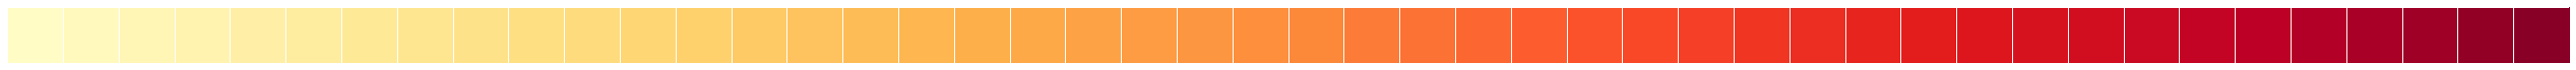

In [163]:

pal_reds = (sns.color_palette("YlOrRd", n_colors=46))
#pal.as_hex()
sns.palplot(pal_reds)

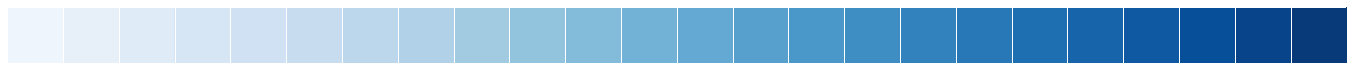

In [164]:

pal_blues = (sns.color_palette("Blues", n_colors=24))
#pal.as_hex()
sns.palplot(pal_blues, )

In [165]:
#pal_reds = pal_reds.as_hex().reverse()

In [166]:
repli_color_dict = dict(zip(repli_set, pal_reds.as_hex()))
struct_color_dict = dict(zip(struct_set, pal_blues.as_hex()))



In [167]:
repli_set

{'ATP dependent DNA ligase',
 'ATP-dependent DNA ligase',
 'Cas4_I-A_I-B_I-C_I-D_II-B Superfamily, gene24',
 'DNA polymerase II small subunit',
 'DNA polymerase elongation subunit (family B)',
 'DNA polymerase family B',
 'DNA polymerase sliding clamp, gene27',
 'DNA repair 2C RadA-like protein',
 'DNA replicative helicase, gene19',
 'DnaJ central domain',
 "DnaQ-like 3'-5' exonuclease, gene18",
 'ERCC4-type nuclease',
 'ERCC4-type nuclease, gene20',
 'HNH domain endonuclease',
 'HNH endonuclease',
 'HNH protein',
 'Hef and HNH endonuclease',
 'Hef nuclease',
 'LAGLIDADG endonuclease',
 'PD-(D/E)XK nuclease',
 'Primase AE_Prim_S, gene21',
 'Primosomal replication  priC-like protein',
 'RNAse HI',
 'RNase HI',
 'Rad3-related DNA helicase',
 'RadA',
 'RecB',
 'Replication factor C small subunit, gene30',
 'Ribonucleotide reductase',
 'SNF2 family helicase',
 'SNF2 family helicase C-terminal domain',
 'SNF2 family helicase N-terminal domain',
 'Transcription initiation factor TFIIIB',
 'U

In [168]:
struct_color_dict[' major capsid protein'] = '#0b559f'
struct_color_dict['Phage tail assembly chaperone protein'] = '#88b1d4'
struct_color_dict['tail assembly chaperone '] =  '#88b1d4'


struct_color_dict['portal protein'] =  '#e8e4f0'

struct_color_dict['putative phage tail tape measure protein'] =  '#1379b5'
struct_color_dict['tape measure'] =  '#1379b5'

struct_color_dict['terminase'] = '#08488e'
struct_color_dict['baseplate J-like protein'] = '#1764ab'


In [169]:
struct_color_dict['tail baseplate']

u'#1764ab'

In [170]:
repli_color_dict['ATP dependent DNA ligase'] = '#db3926'

repli_color_dict['endonuclease'] =  '#970026'
repli_color_dict['HNH endonuclease'] =  '#970026'
repli_color_dict['HNH protein'] =  '#970026'
repli_color_dict['Hef and HNH endonuclease'] =  '#970026'
repli_color_dict['Hef nuclease'] =  '#970026'
repli_color_dict['UvrD-like helicase/homing endonuclease'] =  '#970026'
repli_color_dict['LAGLIDADG endonuclease'] =  '#970026'
repli_color_dict['UvrD-like helicase/homing endonuclease'] =  '#970026'



repli_color_dict['RNase HI']=  '#d7121f'
repli_color_dict['ribonucleoside-triphosphate reductase'] =  '#fedb7b'
repli_color_dict['ribonucleotide reductase'] =  '#fedb7b'

repli_color_dict['DNA polymerase family B']=  '#a20026'
repli_color_dict['DNA polymerase elongation subunit (family B)']=  '#a20026'
repli_color_dict['DNA polymerase II small subunit']=  '#a20026'

repli_color_dict['ERCC4-type nuclease'] = '#fec45f'
#',
 #'ERCC4-type nuclease, gene20

In [171]:
len_dict = {'contig_156409' : 118409, 'SAMEA2621061_122' : 106637, 'contig_154592' : 96096, 'complete_871648617' : 100277,
           'SAMEA2620879_23' : 93879, 'contig_155773' : 85000, 'contig_155057' : 95089, 'contig_172037' : 61133 }

In [174]:
df_dict = {'contig_156409' : contig_156409_group_A_annotation, 'SAMEA2621061_122' : SAMEA2621061_122_annotations,
               'contig_154592' : contig_154592_annotations, 'complete_871648617' : complete_871648617_annotations,
               'SAMEA2620879_23' : SAMEA2620879_23_annotations, 'contig_155773' : contig_155773_annotations,
               'contig_155057' : contig_155057_annotations, 'contig_172037' : contig_172037_annotations}

df_dict_haloviruses = {'HCTV1_1' : HCTV1,  'HCTV1_2' : HCTV1, 'HCTV5_1' : HCTV5,
                       'HCTV5_2' : HCTV5, 'HRTV7' : HRTV7, 'HRTV5' : HRTV5, 'HCTV1' : HCTV1, 'HCTV5' : HCTV5}

In [175]:
coord_dict_replisome = {'contig_156409' : (15, 38), 'SAMEA2621061_122' : (53,74), 'contig_154592' : (33,70),
            'complete_871648617' : (90,120),
           'SAMEA2620879_23' : (93,123), 'contig_155773' : (36,59), 'contig_155057' : (6,22), 'contig_172037' : (29,48)}

coord_dict_struc = {'contig_156409' : (79, 89), 'SAMEA2621061_122' : (24,34), 'contig_154592' : (72,87),
            'complete_871648617' : (19,32),
           'SAMEA2620879_23' : (17,28), 'contig_155773' : (86,98), 'contig_155057' : (59,81), 'contig_172037' : (6,14)}

coord_dict_replisome_haloviruses = {'HCTV1_1' : (26, 38), 'HCTV1_2' : (47,100), 'HCTV5_1' : (22,35),
            'HCTV5_2' : (39,98), 'HRTV7' : (39,85), 'HRTV5' : (38,96)} 

coord_dict_struc_haloviruses = {'HCTV1' : (104, 126),  'HCTV5' : (104,130),'HRTV7' : (7,30), 'HRTV5' : (8,30)}

#### plot replisome

In [176]:

gd_diagram = GenomeDiagram.Diagram('all_replisome_zoom')
max_len = 0#max(len_dict.values())



for contig, DF in df_dict.iteritems():

    
    gd_track_for_features = gd_diagram.new_track(1, greytrack=1, name=contig, scale_fontsize = 8,
        scale_ticks=0.1 ,scale_smalltick_lables=1, scale_smalltick_interval=5000, scale_smallticks=0.1,
        scale_smalltick_labels=1, scale_largetick_labels=0.1)
    gd_feature_set = gd_track_for_features.new_set()

    ec = coord_dict_replisome[contig][1]
    sc = coord_dict_replisome[contig][0]
    for index, row in DF.iterrows():
        e = int(DF[DF['name'].str.contains('_'+str(ec)+'_')]['end'])
        s = int(DF[DF['name'].str.contains('_'+str(sc)+'_')]['start'])
        gene_num = row['name'].split('_')[1]
        if max_len:
            if e > max_len:
                mac_len = e
        #else:
         #   max_len = e
        if int(gene_num) >= sc and int(gene_num) <= ec:
            
            Category = Category_dict[row['orf_annotation'].strip()]
            
            fr = row['strand']
            if fr == '+':
                fr = +1
                lb =45
            elif fr == '-':
                fr = -1
                lb = -225
            else:
                fr = 0
            start = int(row['start'])
            end = int(row['end'])
            
            feature = SeqFeature(FeatureLocation(end, start), strand=fr)
            if Category == 'Replication, recombination and repair':
                col = repli_color_dict[row['orf_annotation']]
                gd_feature_set.add_feature(feature, label=True, color=col, label_angle=lb, sigil="ARROW",arrowshaft_height=0.6, 
                                 tracklines=0, label_position="middle", name=row['orf_annotation'], arrowhead_length=0.2, lable_size=12)
            elif Category != 'hypothetical protein':
                col = Category_color_dict[Category]
                gd_feature_set.add_feature(feature, label=True, color=col, label_angle=lb, sigil="ARROW",arrowshaft_height=0.6, 
                                 tracklines=0, label_position="middle", name=row['orf_annotation'], arrowhead_length=0.2, lable_size=12)
                                
gd_diagram.draw(format='linear', pagesize='A4', fragments=1)#, start=0, end=max_len)
gd_diagram.write(path + '/figuers/all_contigs_replisome_rep_names.pdf','pdf')    
    
    
    
   
    
    
    
   
        
  

### Plot replisom haloviruses

In [177]:

gd_diagram = GenomeDiagram.Diagram('all_replisome_zoom_halo')
max_len = 0#max(len_dict.values())



for contig, DF in df_dict_haloviruses.iteritems():

    
    gd_track_for_features = gd_diagram.new_track(1, greytrack=1, name=contig, scale_fontsize = 8,
        scale_ticks=0.1 ,scale_smalltick_lables=1, scale_smalltick_interval=5000, scale_smallticks=0.1,
        scale_smalltick_labels=1, scale_largetick_labels=0.1)
    gd_feature_set = gd_track_for_features.new_set()
    if contig in coord_dict_replisome_haloviruses:
        ec = coord_dict_replisome_haloviruses[contig][1]
        sc = coord_dict_replisome_haloviruses[contig][0]
        for index, row in DF.iterrows():
        #e = int(DF[DF['name'].str.contains('_'+str(ec)+'_')]['end'])
        #s = int(DF[DF['name'].str.contains('_'+str(sc)+'_')]['start'])
            gene_num = row['Gene']#.split('_')[1]
            if max_len:
                if e > max_len:
                    mac_len = e
            #else:
             #   max_len = e
            if int(gene_num) >= sc and int(gene_num) <= ec:
            
                Category = Category_dict[row['Product'].strip()]
            
                fr = row['Strand']
                if fr == '+':
                    fr = +1
                    lb =45
                elif fr == '-':
                    fr = -1
                    lb = -225
                else:
                    fr = 0
                start = int(row['Start'])
                end = int(row['End'])
            
                feature = SeqFeature(FeatureLocation(end, start), strand=fr)
                if Category == 'Replication, recombination and repair':
                    col = repli_color_dict[row['Product']]
                    gd_feature_set.add_feature(feature, label=True, color=col, label_angle=lb, sigil="ARROW",arrowshaft_height=0.6, 
                            tracklines=0, label_position="middle", name=row['Product'], arrowhead_length=0.2, lable_size=12)
                elif Category == 'Structural protein':
                    col = struct_color_dict[row['orf_annotation'].strip()]
                    gd_feature_set.add_feature(feature, label=True, color=col, label_angle=lb, sigil="ARROW",arrowshaft_height=0.6, 
                                 tracklines=0, label_position="middle", name=row['Product'], arrowhead_length=0.2, lable_size=12)
                elif Category != 'hypothetical protein':
                    col = Category_color_dict[Category]
                    gd_feature_set.add_feature(feature, label=True, color=col, label_angle=lb, sigil="ARROW",arrowshaft_height=0.6, 
                                 tracklines=0, label_position="middle", name=row['Product'], arrowhead_length=0.2, lable_size=12)
                                
gd_diagram.draw(format='linear', pagesize='A4', fragments=1, start=0, end=90000)
gd_diagram.write(path + '/figuers/haloviruses_contigs_replisome_rep.pdf','pdf')    
    
    
    
   
    
    
    
   
        
  

#### strcturals

In [178]:

gd_diagram = GenomeDiagram.Diagram('all_struct_zoom')
max_len = 0#max(len_dict.values())



for contig, DF in df_dict.iteritems():

    
    gd_track_for_features = gd_diagram.new_track(1, greytrack=1, name=contig, scale_fontsize = 8,
        scale_ticks=0.1 ,scale_smalltick_lables=1, scale_smalltick_interval=5000, scale_smallticks=0.1,
        scale_smalltick_labels=1, scale_largetick_labels=0.1)
    gd_feature_set = gd_track_for_features.new_set()

    ec = coord_dict_struc[contig][1]
    sc = coord_dict_struc[contig][0]
    for index, row in DF.iterrows():
        e = int(DF[DF['name'].str.contains('_'+str(ec)+'_')]['end'])
        s = int(DF[DF['name'].str.contains('_'+str(sc)+'_')]['start'])
        gene_num = row['name'].split('_')[1]
        if max_len:
            if e > max_len:
                mac_len = e
        #else:
         #   max_len = e
        if int(gene_num) >= sc and int(gene_num) <= ec:
            
            Category = Category_dict[row['orf_annotation'].strip()]
            
            fr = row['strand']
            if fr == '+':
                fr = +1
                lb =45
            elif fr == '-':
                fr = -1
                lb = -225
            else:
                fr = 0
            start = int(row['start'])
            end = int(row['end'])
            
            feature = SeqFeature(FeatureLocation(end, start), strand=fr)
            if Category == 'Structural protein':
                col = struct_color_dict[row['orf_annotation'].strip()]
                gd_feature_set.add_feature(feature, label=True, color=col, label_angle=lb, sigil="ARROW",arrowshaft_height=0.6, 
                                 tracklines=0, label_position="middle", name=row['orf_annotation'], arrowhead_length=0.2, lable_size=12)
            
            elif Category == 'Replication, recombination and repair':
                    col = repli_color_dict[row['orf_annotation']]
                    gd_feature_set.add_feature(feature, label=True, color=col, label_angle=lb, sigil="ARROW",arrowshaft_height=0.6, 
                                 tracklines=0, label_position="middle", name=row['orf_annotation'], arrowhead_length=0.2, lable_size=12)
                
                
            elif Category != 'hypothetical protein':
                col = Category_color_dict[Category]
                gd_feature_set.add_feature(feature, label=True, color=col, label_angle=lb, sigil="ARROW",arrowshaft_height=0.6, 
                                 tracklines=0, label_position="middle", name=row['orf_annotation'], arrowhead_length=0.2, lable_size=12)
                                
gd_diagram.draw(format='linear', pagesize='A4', fragments=1)#, start=0, end=max_len)
gd_diagram.write(path + '/figuers/all_contigs_struct_re.pdf','pdf')    
    
    
    
    
    
    
    
   
        
  

### Plot struct haloviruses

In [179]:

gd_diagram = GenomeDiagram.Diagram('all_struct_zoom_halo')
max_len = 0#max(len_dict.values())



for contig, DF in df_dict_haloviruses.iteritems():
    print contig


    if contig in coord_dict_struc_haloviruses.keys():
        gd_track_for_features = gd_diagram.new_track(1, greytrack=1, name=contig, scale_fontsize = 8,
        scale_ticks=0.1 ,scale_smalltick_lables=1, scale_smalltick_interval=5000, scale_smallticks=0.1,
        scale_smalltick_labels=1, scale_largetick_labels=0.1)
        gd_feature_set = gd_track_for_features.new_set()

        ec = coord_dict_struc_haloviruses[contig][1]
        sc = coord_dict_struc_haloviruses[contig][0]
        for index, row in DF.iterrows():
            #e = int(DF[DF['name'].str.contains('_'+str(ec)+'_')]['end'])
            #s = int(DF[DF['name'].str.contains('_'+str(sc)+'_')]['start'])
            gene_num = row['Gene']#.split('_')[1]
            if max_len:
                if e > max_len:
                    mac_len = e
            #else:
             #   max_len = e
            if int(gene_num) >= sc and int(gene_num) <= ec:
                
                Category = Category_dict[row['Product'].strip()]
            
                fr = row['Strand']
                if fr == '+':
                    fr = +1
                    lb =45
                elif fr == '-':
                    fr = -1
                    lb = -225
                else:
                    fr = 0
                start = int(row['Start'])
                end = int(row['End'])
            
                feature = SeqFeature(FeatureLocation(end, start), strand=fr)
                if Category == 'Replication, recombination and repair':
                    col = repli_color_dict[row['Product']]
                    gd_feature_set.add_feature(feature, label=True, color=col, label_angle=lb, sigil="ARROW",arrowshaft_height=0.6, 
                                 tracklines=0, label_position="middle", name=row['Product'], arrowhead_length=0.2, lable_size=12)
                elif Category == 'Structural protein':
                    col = struct_color_dict[row['Product'].strip()]
                    gd_feature_set.add_feature(feature, label=True, color=col, label_angle=lb, sigil="ARROW",arrowshaft_height=0.6, 
                                 tracklines=0, label_position="middle", name=row['Product'], arrowhead_length=0.2, lable_size=12)
                elif Category != 'hypothetical protein':
                    col = Category_color_dict[Category]
                    gd_feature_set.add_feature(feature, label=True, color=col, label_angle=lb, sigil="ARROW",arrowshaft_height=0.6, 
                                 tracklines=0, label_position="middle", name=row['Product'], arrowhead_length=0.2, lable_size=12)
                                
gd_diagram.draw(format='linear', pagesize='A4', fragments=1, start=0, end=90000)
gd_diagram.write(path + '/figuers/haloviruses_contigs_struct_rep.pdf','pdf')    
    
    
    
   
    
    
    
   
        
  

HCTV1_1
HCTV1_2
HRTV5
HCTV5_1
HCTV5_2
HCTV5
HRTV7
HCTV1


#### contig_156409 circular new colors

In [181]:

contig_156409_feature_set = GenomeDiagram.FeatureSet()
contig_156409_gd = GenomeDiagram.Diagram('contig_156409')
contig_156409_gd_features = contig_156409_gd.new_track(1, greytrack=0, name='contig_156409', scale_ticks=0.1 ,scale_smalltick_lables=1, scale_smalltick_interval=10000, scale_smallticks=-0.3)
contig_156409_gd_features = contig_156409_gd_features.new_set()
for index, row in contig_156409_group_A_annotation.iterrows():
        l = len(row)
        Category = Category_dict[row['orf_annotation']]
        gene_num = row['name'].split('_')[1]
        fr = row['strand']
        if fr == '+':
            fr = +1
            lb =45
        elif fr == '-':
            fr = -1
            lb = -225
        else:
            fr = 0
        start = int(row['start'])
        end = int(row['end'])
        #col = Category_color_dict[Category]
        feature = SeqFeature(FeatureLocation(start, end), strand=fr)
        if Category == 'Structural protein':
            col = struct_color_dict[row['orf_annotation'].strip()]
            contig_156409_gd_features.add_feature(feature, label=False, color=col, lable_size=3, label_angle=lb, sigil="ARROW",arrowshaft_height=0.5, 
                                 tracklines=0, label_position="middle", name=gene_num, arrowhead_length=0.5,)
        
        
        elif Category == 'Replication, recombination and repair':
            col = repli_color_dict[row['orf_annotation'].strip()]
            contig_156409_gd_features.add_feature(feature, label=False, color=col, lable_size=3, label_angle=lb, sigil="ARROW",arrowshaft_height=0.5, 
                                 tracklines=0, label_position="middle", name=gene_num, arrowhead_length=0.5,)
            #contig_156409_gd.draw(format='circular', circular=True, pagesize=('A4'),circle_core=0.7, start=0, end=118409)
            #contig_156409_gd.write(path + '/figuers/contig_156409_circ_arrows_new_colors.pdf','pdf')
        
        else:
            col = Category_color_dict[Category]
            contig_156409_gd_features.add_feature(feature, label=False, color=col, lable_size=3, label_angle=lb, sigil="ARROW",arrowshaft_height=0.5, 
                                 tracklines=0, label_position="middle", name=gene_num, arrowhead_length=0.5,)
            
contig_156409_gd.draw(format='circular', circular=True, pagesize=('A4'),circle_core=0.7)#, start=0, end=118409)
contig_156409_gd.write(path + '/figuers/contig_156409_circ_arrows_no_labs_new_colors.pdf','pdf')

#### complete_871648617 circular new colors

In [182]:

complete_871648617_feature_set = GenomeDiagram.FeatureSet()
complete_871648617_gd = GenomeDiagram.Diagram('complete_871648617')
complete_871648617_gd_features = complete_871648617_gd.new_track(1, greytrack=0, name='complete_871648617', scale_ticks=0.1 ,scale_smalltick_lables=1, scale_smalltick_interval=10000, scale_smallticks=-0.3)
complete_871648617_gd_features = complete_871648617_gd_features.new_set()
for index, row in complete_871648617_annotations.iterrows():
        l = len(row)
        Category = Category_dict[row['orf_annotation'].strip()]
        gene_num = row['name'].split('_')[1]
        fr = row['strand']
        if fr == '+':
            fr = +1
            lb =45
        elif fr == '-':
            fr = -1
            lb = -225
        else:
            fr = 0
        start = int(row['start'])
        end = int(row['end'])
        #col = Category_color_dict[Category]
        feature = SeqFeature(FeatureLocation(start, end), strand=fr)
        if Category == 'Structural protein':
            col = struct_color_dict[row['orf_annotation'].strip()]
            complete_871648617_gd_features.add_feature(feature, label=False, color=col, lable_size=3, label_angle=lb, sigil="ARROW",arrowshaft_height=0.5, 
                                 tracklines=0, label_position="middle", name=gene_num, arrowhead_length=0.5,)
        
        
        elif Category == 'Replication, recombination and repair':
            col = repli_color_dict[row['orf_annotation'].strip()]
            #print feature
            complete_871648617_gd_features.add_feature(feature, label=False, color=col, lable_size=3, label_angle=lb, sigil="ARROW",arrowshaft_height=0.5, 
                                 tracklines=0, label_position="middle", name=gene_num, arrowhead_length=0.5,)
            #contig_156409_gd.draw(format='circular', circular=True, pagesize=('A4'),circle_core=0.7, start=0, end=118409)
            #contig_156409_gd.write(path + '/figuers/contig_156409_circ_arrows_new_colors.pdf','pdf')
        
        else:
            col = Category_color_dict[Category]
            
            complete_871648617_gd_features.add_feature(feature, label=False, color=col, lable_size=3, label_angle=lb, sigil="ARROW",arrowshaft_height=0.5, 
                                 tracklines=0, label_position="middle", name=gene_num, arrowhead_length=0.5)
            
complete_871648617_gd.draw(format='circular', circular=True, pagesize=('A4'),circle_core=0.7)#, start=0, end=100277)
complete_871648617_gd.write(path + '/figuers/complete_871648617_circ_arrows_no_labs_new_colors.pdf','pdf')

### SAMEA2620879_23 circular new colors

In [183]:

SAMEA2620879_23_feature_set = GenomeDiagram.FeatureSet()
SAMEA2620879_23_gd = GenomeDiagram.Diagram('SAMEA2620879_23SAMEA2620879_23')
SAMEA2620879_23_gd_features = SAMEA2620879_23_gd.new_track(1, greytrack=0, name='SAMEA2620879_23', scale_ticks=0.1 ,scale_smalltick_lables=1, scale_smalltick_interval=10000, scale_smallticks=-0.3)
SAMEA2620879_23_gd_features = SAMEA2620879_23_gd_features.new_set()
for index, row in SAMEA2620879_23_annotations.iterrows():
        l = len(row)
        Category = Category_dict[row['orf_annotation'].strip()]
        gene_num = row['name'].split('_')[1]
        fr = row['strand']
        if fr == '+':
            fr = +1
            lb =45
        elif fr == '-':
            fr = -1
            lb = -225
        else:
            fr = 0
        start = int(row['start'])
        end = int(row['end'])
        #col = Category_color_dict[Category]
        feature = SeqFeature(FeatureLocation(start, end), strand=fr)
        if Category == 'Structural protein':
            col = struct_color_dict[row['orf_annotation'].strip()]
            SAMEA2620879_23_gd_features.add_feature(feature, label=False, color=col, lable_size=3, label_angle=lb, sigil="ARROW",arrowshaft_height=0.5, 
                                 tracklines=0, label_position="middle", name=gene_num, arrowhead_length=0.5,)
        
        
        elif Category == 'Replication, recombination and repair':
            col = repli_color_dict[row['orf_annotation'].strip()]
            #print feature
            SAMEA2620879_23_gd_features.add_feature(feature, label=False, color=col, lable_size=3, label_angle=lb, sigil="ARROW",arrowshaft_height=0.5, 
                                 tracklines=0, label_position="middle", name=gene_num, arrowhead_length=0.5,)
            #contig_156409_gd.draw(format='circular', circular=True, pagesize=('A4'),circle_core=0.7, start=0, end=118409)
            #contig_156409_gd.write(path + '/figuers/contig_156409_circ_arrows_new_colors.pdf','pdf')
        
        else:
            col = Category_color_dict[Category]
            
            SAMEA2620879_23_gd_features.add_feature(feature, label=False, color=col, lable_size=3, label_angle=lb, sigil="ARROW",arrowshaft_height=0.5, 
                                 tracklines=0, label_position="middle", name=gene_num, arrowhead_length=0.5)
            
SAMEA2620879_23_gd.draw(format='circular', circular=True, pagesize=('A4'),circle_core=0.7)#, start=0, end=100277)
SAMEA2620879_23_gd.write(path + '/figuers/SAMEA2620879_23_circ_arrows_no_labs_new_colors.pdf','pdf')

### contig_155057 circular new colors

In [184]:

contig_155057_feature_set = GenomeDiagram.FeatureSet()
contig_155057_gd = GenomeDiagram.Diagram('contig_155057')
contig_155057_gd_features = contig_155057_gd.new_track(1, greytrack=0, name='contig_155057', scale_ticks=0.1 ,scale_smalltick_lables=1, scale_smalltick_interval=10000, scale_smallticks=-0.3)
contig_155057_gd_features = contig_155057_gd_features.new_set()
for index, row in contig_155057_annotations.iterrows():
        l = len(row)
        Category = Category_dict[row['orf_annotation'].strip()]
        gene_num = row['name'].split('_')[1]
        fr = row['strand']
        if fr == '+':
            fr = +1
            lb =45
        elif fr == '-':
            fr = -1
            lb = -225
        else:
            fr = 0
        start = int(row['start'])
        end = int(row['end'])
        #col = Category_color_dict[Category]
        feature = SeqFeature(FeatureLocation(start, end), strand=fr)
        if Category == 'Structural protein':
            col = struct_color_dict[row['orf_annotation'].strip()]
            contig_155057_gd_features.add_feature(feature, label=False, color=col, lable_size=3, label_angle=lb, sigil="ARROW",arrowshaft_height=0.5, 
                                 tracklines=0, label_position="middle", name=gene_num, arrowhead_length=0.5,)
        
        
        elif Category == 'Replication, recombination and repair':
            col = repli_color_dict[row['orf_annotation'].strip()]
            #print feature
            contig_155057_gd_features.add_feature(feature, label=False, color=col, lable_size=3, label_angle=lb, sigil="ARROW",arrowshaft_height=0.5, 
                                 tracklines=0, label_position="middle", name=gene_num, arrowhead_length=0.5,)
            #contig_156409_gd.draw(format='circular', circular=True, pagesize=('A4'),circle_core=0.7, start=0, end=118409)
            #contig_156409_gd.write(path + '/figuers/contig_156409_circ_arrows_new_colors.pdf','pdf')
        
        else:
            col = Category_color_dict[Category]
            
            contig_155057_gd_features.add_feature(feature, label=False, color=col, lable_size=3, label_angle=lb, sigil="ARROW",arrowshaft_height=0.5, 
                                 tracklines=0, label_position="middle", name=gene_num, arrowhead_length=0.5)
            
contig_155057_gd.draw(format='circular', circular=True, pagesize=('A4'),circle_core=0.7)#, start=0, end=100277)
contig_155057_gd.write(path + '/figuers/contig_155057_circ_arrows_no_labs_new_colors.pdf','pdf')

### HCTV5 circular new colors 

In [185]:

HCTV5_feature_set = GenomeDiagram.FeatureSet()
HCTV5_gd = GenomeDiagram.Diagram('HCTV5')
HCTV5_gd_features = HCTV5_gd.new_track(1, greytrack=0, name='HCTV5', scale_ticks=0.1 ,scale_smalltick_lables=1, scale_smalltick_interval=10000, scale_smallticks=-0.3)
HCTV5_gd_features = HCTV5_gd_features.new_set()
for index, row in HCTV5.iterrows():
        l = len(row)
        Category = Category_dict[row['Product']]
        gene_num = row['Gene']
        fr = row['Strand']
        if fr == '+':
            fr = +1
            lb =45
        elif fr == '-':
            fr = -1
            lb = -225
        else:
            fr = 0
        start = int(row['Start'])
        end = int(row['End'])

        #col = Category_color_dict[Category]
        feature = SeqFeature(FeatureLocation(start, end), strand=fr)
        if Category == 'Structural protein':
            col = struct_color_dict[row['Product'].strip()]
            HCTV5_gd_features.add_feature(feature, label=True, color=col, lable_size=3, label_angle=lb, sigil="ARROW",arrowshaft_height=0.5, 
                                 tracklines=0, label_position="middle", name=row['Product'] + ' ' + gene_num, arrowhead_length=0.5,)
        
        
        elif Category == 'Replication, recombination and repair':
            col = repli_color_dict[row['Product'].strip()]
            #print feature
            HCTV5_gd_features.add_feature(feature, label=True, color=col, lable_size=3, label_angle=lb, sigil="ARROW",arrowshaft_height=0.5, 
                                 tracklines=0, label_position="middle", name=row['Product'] + ' ' + gene_num, arrowhead_length=0.5,)
            #contig_156409_gd.draw(format='circular', circular=True, pagesize=('A4'),circle_core=0.7, start=0, end=118409)
            #contig_156409_gd.write(path + '/figuers/contig_156409_circ_arrows_new_colors.pdf','pdf')
        
        else:
            col = Category_color_dict[Category]
            
            HCTV5_gd_features.add_feature(feature, label=True, color=col, lable_size=3, label_angle=lb, sigil="ARROW",arrowshaft_height=0.5, 
                                 tracklines=0, label_position="middle", name=row['Product'] + ' ' + gene_num, arrowhead_length=0.5)
            
HCTV5_gd.draw(format='circular', circular=True, pagesize=('A4'),circle_core=0.7)#, start=0, end=100277)
HCTV5_gd.write(path + '/figuers/HCTV5_circ_arrows_no_labs_new_colors_labs.pdf','pdf')

### HVTV1 circular new colors 

In [186]:

HVTV1_feature_set = GenomeDiagram.FeatureSet()
HVTV1_gd = GenomeDiagram.Diagram('HVTV1')
HVTV1_gd_features = HVTV1_gd.new_track(1, greytrack=0, name='HVTV1', scale_ticks=0.1 ,scale_smalltick_lables=1, scale_smalltick_interval=10000, scale_smallticks=-0.3)
HVTV1_gd_features = HVTV1_gd_features.new_set()
for index, row in HVTV1.iterrows():
        l = len(row)
        Category = Category_dict[row['Product']]
        gene_num = row['Gene']
        fr = row['Strand']
        if fr == '+':
            fr = +1
            lb =45
        elif fr == '-':
            fr = -1
            lb = -225
        else:
            fr = 0
        start = int(row['Start'])
        end = int(row['End'])

        #col = Category_color_dict[Category]
        feature = SeqFeature(FeatureLocation(start, end), strand=fr)
        if Category == 'Structural protein':
            col = struct_color_dict[row['Product'].strip()]
            HVTV1_gd_features.add_feature(feature, label=False, color=col, lable_size=3, label_angle=lb, sigil="ARROW",arrowshaft_height=0.5, 
                                 tracklines=0, label_position="middle", name=gene_num, arrowhead_length=0.5,)
        
        
        elif Category == 'Replication, recombination and repair':
            col = repli_color_dict[row['Product'].strip()]
            #print feature
            HVTV1_gd_features.add_feature(feature, label=False, color=col, lable_size=3, label_angle=lb, sigil="ARROW",arrowshaft_height=0.5, 
                                 tracklines=0, label_position="middle", name=gene_num, arrowhead_length=0.5,)
            #contig_156409_gd.draw(format='circular', circular=True, pagesize=('A4'),circle_core=0.7, start=0, end=118409)
            #contig_156409_gd.write(path + '/figuers/contig_156409_circ_arrows_new_colors.pdf','pdf')
        
        else:
            col = Category_color_dict[Category]
            
            HVTV1_gd_features.add_feature(feature, label=False, color=col, lable_size=3, label_angle=lb, sigil="ARROW",arrowshaft_height=0.5, 
                                 tracklines=0, label_position="middle", name=gene_num, arrowhead_length=0.5)
            
HVTV1_gd.draw(format='circular', circular=True, pagesize=('A4'),circle_core=0.7)#, start=0, end=100277)
HVTV1_gd.write(path + '/figuers/HVTV1_circ_arrows_no_labs_new_colors.pdf','pdf')

### HCTV1 circular new colors 

In [187]:

HCTV1_feature_set = GenomeDiagram.FeatureSet()
HCTV1_gd = GenomeDiagram.Diagram('HCTV1')
HCTV1_gd_features = HCTV1_gd.new_track(1, greytrack=0, name='HCTV1', scale_ticks=0.1 ,scale_smalltick_lables=1, scale_smalltick_interval=10000, scale_smallticks=-0.3)
HCTV1_gd_features = HCTV1_gd_features.new_set()
for index, row in HCTV1.iterrows():
        l = len(row)
        Category = Category_dict[row['Product']]
        gene_num = row['Gene']
        fr = row['Strand']
        if fr == '+':
            fr = +1
            lb =45
        elif fr == '-':
            fr = -1
            lb = -225
        else:
            fr = 0
        start = int(row['Start'])
        end = int(row['End'])

        #col = Category_color_dict[Category]
        feature = SeqFeature(FeatureLocation(start, end), strand=fr)
        if Category == 'Structural protein':
            col = struct_color_dict[row['Product'].strip()]
            HCTV1_gd_features.add_feature(feature, label=True, color=col, lable_size=3, label_angle=lb, sigil="ARROW",arrowshaft_height=0.5, 
                                 tracklines=0, label_position="middle", name=row['Product'] + ' ' + gene_num, arrowhead_length=0.5,)
        
        
        elif Category == 'Replication, recombination and repair':
            col = repli_color_dict[row['Product'].strip()]
            #print feature
            HCTV1_gd_features.add_feature(feature, label=True, color=col, lable_size=3, label_angle=lb, sigil="ARROW",arrowshaft_height=0.5, 
                                 tracklines=0, label_position="middle", name=row['Product'] + ' ' + gene_num, arrowhead_length=0.5,)
            #contig_156409_gd.draw(format='circular', circular=True, pagesize=('A4'),circle_core=0.7, start=0, end=118409)
            #contig_156409_gd.write(path + '/figuers/contig_156409_circ_arrows_new_colors.pdf','pdf')
        
        else:
            col = Category_color_dict[Category]
            
            HCTV1_gd_features.add_feature(feature, label=True, color=col, lable_size=3, label_angle=lb, sigil="ARROW",arrowshaft_height=0.5, 
                                 tracklines=0, label_position="middle", name=row['Product'] + ' ' + gene_num, arrowhead_length=0.5)
            
HCTV1_gd.draw(format='circular', circular=True, pagesize=('A4'),circle_core=0.7)#, start=0, end=100277)
HCTV1_gd.write(path + '/figuers/HCTV1_circ_arrows_no_labs_new_colors_labs.pdf','pdf')

### HRTV5 circular new colors

In [188]:

HRTV5_feature_set = GenomeDiagram.FeatureSet()
HRTV5_gd = GenomeDiagram.Diagram('HRTV5')
HRTV5_gd_features = HRTV5_gd.new_track(1, greytrack=0, name='HRTV5', scale_ticks=0.1 ,scale_smalltick_lables=1, scale_smalltick_interval=10000, scale_smallticks=-0.3)
HRTV5_gd_features = HRTV5_gd_features.new_set()
for index, row in HRTV5.iterrows():
        l = len(row)
        Category = Category_dict[row['Product']]
        gene_num = row['Gene']
        fr = row['Strand']
        if fr == '+':
            fr = +1
            lb =45
        elif fr == '-':
            fr = -1
            lb = -225
        else:
            fr = 0
        start = int(row['Start'])
        end = int(row['End'])

        #col = Category_color_dict[Category]
        feature = SeqFeature(FeatureLocation(start, end), strand=fr)
        if Category == 'Structural protein':
            col = struct_color_dict[row['Product'].strip()]
            HRTV5_gd_features.add_feature(feature, label=True, color=col, lable_size=3, label_angle=lb, sigil="ARROW",arrowshaft_height=0.5, 
                                 tracklines=0, label_position="middle", name=row['Product'] + ' ' + gene_num, arrowhead_length=0.5,)
        
        
        elif Category == 'Replication, recombination and repair':
            col = repli_color_dict[row['Product'].strip()]
            #print feature
            HRTV5_gd_features.add_feature(feature, label=True, color=col, lable_size=3, label_angle=lb, sigil="ARROW",arrowshaft_height=0.5, 
                                 tracklines=0, label_position="middle", name=row['Product'] + ' ' + gene_num, arrowhead_length=0.5,)
            #contig_156409_gd.draw(format='circular', circular=True, pagesize=('A4'),circle_core=0.7, start=0, end=118409)
            #contig_156409_gd.write(path + '/figuers/contig_156409_circ_arrows_new_colors.pdf','pdf')
        
        else:
            col = Category_color_dict[Category]
            
            HRTV5_gd_features.add_feature(feature, label=False, color=col, lable_size=3, label_angle=lb, sigil="ARROW",arrowshaft_height=0.5, 
                                 tracklines=0, label_position="middle", name=gene_num, arrowhead_length=0.5)
            
HRTV5_gd.draw(format='circular', circular=True, pagesize=('A4'),circle_core=0.7)#, start=0, end=100277)
HRTV5_gd.write(path + '/figuers/HRTV5_circ_arrows_no_labs_new_colors_labs.pdf','pdf')

### HRTV7 circular new colors

In [189]:

HRTV7_feature_set = GenomeDiagram.FeatureSet()
HRTV7_gd = GenomeDiagram.Diagram('HRTV7')
HRTV7_gd_features = HRTV7_gd.new_track(1, greytrack=0, name='HRTV7', scale_ticks=0.1 ,scale_smalltick_lables=1, scale_smalltick_interval=10000, scale_smallticks=-0.3)
HRTV7_gd_features = HRTV7_gd_features.new_set()
for index, row in HRTV7.iterrows():
        l = len(row)
        Category = Category_dict[row['Product']]
        gene_num = row['Gene']
        fr = row['Strand']
        if fr == '+':
            fr = +1
            lb =45
        elif fr == '-':
            fr = -1
            lb = -225
        else:
            fr = 0
        start = int(row['Start'])
        end = int(row['End'])

        #col = Category_color_dict[Category]
        feature = SeqFeature(FeatureLocation(start, end), strand=fr)
        if Category == 'Structural protein':
            col = struct_color_dict[row['Product'].strip()]
            HRTV7_gd_features.add_feature(feature, label=True, color=col, lable_size=3, label_angle=lb, sigil="ARROW",arrowshaft_height=0.5, 
                                 tracklines=0, label_position="middle", name= row['Product'] + ' ' + gene_num, arrowhead_length=0.5,)
        
        
        elif Category == 'Replication, recombination and repair':
            col = repli_color_dict[row['Product'].strip()]
            #print feature
            HRTV7_gd_features.add_feature(feature, label=True, color=col, lable_size=3, label_angle=lb, sigil="ARROW",arrowshaft_height=0.5, 
                                 tracklines=0, label_position="middle", name= row['Product'] + ' ' +gene_num, arrowhead_length=0.5,)
            #contig_156409_gd.draw(format='circular', circular=True, pagesize=('A4'),circle_core=0.7, start=0, end=118409)
            #contig_156409_gd.write(path + '/figuers/contig_156409_circ_arrows_new_colors.pdf','pdf')
        
        else:
            col = Category_color_dict[Category]
            
            HRTV7_gd_features.add_feature(feature, label=False, color=col, lable_size=3, label_angle=lb, sigil="ARROW",arrowshaft_height=0.5, 
                                 tracklines=0, label_position="middle", name=gene_num, arrowhead_length=0.5)
            
HRTV7_gd.draw(format='circular', circular=True, pagesize=('A4'),circle_core=0.7)#, start=0, end=100277)
HRTV7_gd.write(path + '/figuers/HRTV7_circ_arrows_no_labs_new_colors_labs.pdf','pdf')